<a href="https://colab.research.google.com/github/martaldsantos/newland_project/blob/master/Group_15_Newland_2ndV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initial Steps**

In [1]:
#APAGAR
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"10TVpC4_CV-h4o2U3P7KjGdvbsiuFFnkN"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Train.xlsx')

In [2]:
#APAGAR
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1HGi23Z_cfEZDjoSQFlVaG5fpvmBWxIYn"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Test.xlsx')

### Libraries, Packages and others

In [3]:
!pip install -r requirements.txt

In [4]:
import pandas as pd
import datetime
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from math import ceil
import scipy.cluster.hierarchy as shc
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import f_classif, chi2
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import KMeansSMOTE
from imblearn.under_sampling import ClusterCentroids
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
import time
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC 
import statsmodels.api as sm
from scipy import stats

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'


import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Functions 

In [101]:
def birthday_to_age(df, column, new_column):
    '''
    This function creates a column representing the difference in years from a given birth year column values
    Having into account that we are on the year 2048
    '''
    
    df[new_column] = df[column].map(lambda x : 2048 - x)
    
def questionmark_to_nan(df, column):
    '''
    This function turns a binary variable with missing values as '?' in NaN
    It needs as input the dataframe and the column name 
    (column name needs to be between '')
    '''
    df[column] = df[column].map(lambda x: np.nan if x == '?' else x)
    
def ohe(df, column_list):
    ohc = OneHotEncoder(sparse = False)
    ohc_feat = ohc.fit_transform(df[column_list])
    ohc_feat_names = ohc.get_feature_names()
    ohc_df = pd.DataFrame(ohc_feat, index = df.index, columns = ohc_feat_names)
    return ohc_df

def hist_box_maker(df,titl, num_of_rows, figx, figy):
    
    fig, axes = plt.subplots(num_of_rows, ceil((len(df.columns)*2)/num_of_rows), figsize=(figx, figy))
    temp = (list(df.columns)*2)
    temp.sort()
    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    i = 0 
    for ax, feat in zip(axes.flatten(), temp):
        
        if i%2 == 0:
            ax.hist(df[feat], bins = 50)
            ax.set_title(feat, y=-0.13)
            pltiswork=feat
            
        else:
            sns.boxplot(x=df[pltiswork], ax = ax)
        
        i+=1
            
    # Layout
    # Add a centered title to the figure:
    title = titl

    plt.suptitle(title)

    plt.show()# All Numer
    
    
def plot_importance(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize = (8,10))
    imp_coef.plot(kind = 'barh')
    plt.title('Feature Importance Using ' + name + ' Regression')
    plt.show()
    
def metrics_val(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))
    print('F1-score, micro: ', f1_score(y_train, pred_train, average = 'micro'))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    print('F1-score, micro: ',f1_score(y_val, pred_val, average = 'micro'))

def hist_box_maker(df,titl, num_of_rows, figx, figy):
    
    fig, axes = plt.subplots(num_of_rows, ceil((len(df.columns)*2)/num_of_rows), figsize=(figx, figy))
    temp = (list(df.columns)*2)
    temp.sort()
    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    i = 0 
    for ax, feat in zip(axes.flatten(), temp):
        
        if i%2 == 0:
            ax.hist(df[feat], bins = 100)
            ax.set_title(feat, y=-0.13)
            pltiswork=feat
            
        else:
            sns.boxplot(x=df[pltiswork], ax = ax)
        
        i+=1
            
    # Layout
    # Add a centered title to the figure:
    title = titl

    plt.suptitle(title)

    plt.show()# All Numeric Variables' Box Plots in one figure
def avg_score(model):
    # apply kfold
    kf = KFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    for train_index, test_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)   


def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=X_train_Original.columns,  
                               class_names=["High income", "Low income"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())
    
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

def final_metrics(y_train, pred_train , y_val, pred_val, y_test, pred_test):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))
    print('F1-score, micro: ', f1_score(y_train, pred_train, average = 'micro'))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    print('F1-score, micro: ',f1_score(y_val, pred_val, average = 'micro'))

    print('___________________________________________________________________________________________________________')
    print('                                                     TEST                                                ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_test, pred_test))
    print(confusion_matrix(y_test, pred_test))
    print('F1-score, micro: ', f1_score(y_test, pred_test, average = 'micro'))

### Import data

In [6]:
train = pd.read_excel("Train.xlsx")
kaggle = pd.read_excel('Test.xlsx')
submission = kaggle[['CITIZEN_ID']].copy()

# **Data Pre-Processing**

## **Data Inspection**


In [7]:
train.isna().sum()

CITIZEN_ID                0
Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
Income                    0
dtype: int64

In [8]:
for i in ["Name", "Native Continent", "Marital Status", "Lives with", "Base Area", "Education Level", "Employment Sector", "Role"]:
    train[i] = train[i].astype("str")

In [9]:
train.dtypes

CITIZEN_ID                 int64
Name                      object
Birthday                  object
Native Continent          object
Marital Status            object
Lives with                object
Base Area                 object
Education Level           object
Years of Education         int64
Employment Sector         object
Role                      object
Working Hours per week     int64
Money Received             int64
Ticket Price               int64
Income                     int64
dtype: object

All seems fine.
However in order to use Native Continent on our models we will need to later perform one hot encoding.
We can't use label encoding since the categories aren't ordered and we would be inducing orders or hierarchies were they don't exist.

In [10]:
train['Native Continent'].value_counts()

Europe     19111
Africa      2187
Asia         699
America      219
Oceania      184
Name: Native Continent, dtype: int64

These values can be turned into binary variables which describe if the person is married, not married (anymore), or never married.
This will allow us to have a better significance in our resuls (meaning, not a huge amount of 0s in binary variables), which we would
have if we proceed to make one hot encoding right now. 
We will make this change later in the feature engineering step.

In [11]:
train['Marital Status'].value_counts()

Married                         10219
Single                           7416
Divorced                         3072
Separated                         699
Widow                             696
Married - Spouse Missing          284
Married - Spouse in the Army       14
Name: Marital Status, dtype: int64

These values can be turned into binary variables. For being able to do so, we will primarily turn the values "Husband" and "Wife" in "Spouse" and "Other Family"
and "Other relatives" in only 1 value as they seem to have the same meaning.
We will make this change later in the feature engineering step.

In [12]:
train['Lives with'].value_counts()

Wife               9012
Other Family       5777
Children           3519
Alone              2362
Husband            1049
Other relatives     681
Name: Lives with, dtype: int64

We have '?' values, wich are clearly missing values, so we have to turn them into ones.
With the high number of missing values, we will probably need to use techniques to fill missing values, for example, the KNN
We also believe we cannot make one hot encoding in this variable otherwise we would create too many variables and they would loose their significance.
However, it is important to highlight that we have a lot of observations with the value Northbury, which means that if we have to make only a binary column with this variable it will have a good representation on the dataset.

In [13]:
train['Base Area'].value_counts() 

Northbury        20074
Fanfoss            443
?                  395
Alverton           135
Butterpond          96
Watford             83
Auchenshuggle       80
Pran                77
Sharnwick           70
Aroonshire          64
Laewaes             63
Fool's March        59
Eelry               56
Wigston             56
Sharpton            54
Lanercost           52
Cherrytown          51
Aerilon             45
King's Watch        44
Bellmoral           40
Kirkwall            40
Knife's Edge        37
Laenteglos          32
Tranmere            30
Drumchapel          25
Aberuthven          23
Orilon              22
Kald                19
Carlisle            18
MillerVille         17
Lewes               16
Willesden           16
Conriston           12
Marnmouth           11
Middlesbrough       10
Mensfield            9
Woodpine             9
Redwick Bush         8
Bellenau             8
Ironforge            1
Name: Base Area, dtype: int64

The categories seem to be good! We believe that a distinction as deep as the one presented is not needed, and so, we will
group some variables as the latest education a person has received.
As we are dealing with Ordinal data, meaning, the variables have a natural order, for example, a PhD is valued higher than a high school degree, we will create a variable that contains the categories representing the education qualification, in integer values, as the algorithm can process these values as an order.
We will make this change later in the feature engineering step.

In [14]:
train['Education Level'].value_counts() 

Professional School                     7232
High School + PostGraduation            4994
Bachelors + PostGraduation              3696
Masters                                 1193
Professional School + PostGraduation     953
High School - 2nd Cycle                  809
Bachelors                                735
High School - 1st Cycle                  649
Middle School - 2nd Cycle                432
Masters + PostGraduation                 397
Middle School Complete                   342
PhD                                      289
High School Complete                     287
Middle School - 1st Cycle                237
Primary School                           122
Preschool                                 33
Name: Education Level, dtype: int64

Has the same missing values problem as before, meaning, when there is missing data it is represented by a "?".
The categories have information about big groups of values (private sector, public sector, etc), so we will retrieve this information in a more correct and larger way.
After doing so, we will probably have to reach to some type of data encoding technique in order to be able to use this information in our model.
We will make this change later in the feature engineering step.

In [15]:
train['Employment Sector'].value_counts() 

Private Sector - Services     15599
Self-Employed (Individual)     1764
Public Sector - Others         1419
?                              1264
Private Sector - Others         880
Self-Employed (Company)         763
Public Sector - Government      692
Unemployed                       12
Never Worked                      7
Name: Employment Sector, dtype: int64

Has the same missing values problem as before, meaning, when there is missing data it is represented by a "?".
The grouping of information (in order to be able to have encoding) in this variable is difficult to tackle.
We will probably use the sectors of the economy to make some type of encoding in this variable.
We will make this change later in the feature engineering step.

In [16]:
train['Role'].value_counts() 

Professor                         2849
Management                        2797
Repair & constructions            2795
Administratives                   2608
Sales                             2531
Other services                    2287
Machine Operators & Inspectors    1384
?                                 1271
Transports                        1071
Cleaners & Handlers                922
Agriculture and Fishing            702
IT                                 626
Security                           450
Household Services                 102
Army                                 5
Name: Role, dtype: int64

As the name is not very important in our analysis, we will proceed on removing the first word from the name, meaning, the gender the person identifies with and we will create a variable with information about the gender.
We will make this change later in the feature engineering step.

In [17]:
train['Name'].head()

0         Mr. Adam Glover
1    Mr. Cameron McDonald
2      Mr. Keith Davidson
3      Mr. Alexander Gill
4          Mr. Neil Piper
Name: Name, dtype: object

Clearly some transformations are needed, if we want to use this variable we will have to do some engineering. 

In [18]:
train['Birthday'].head() 

0         July 1,2003
1     January 25,2006
2         May 10,2009
3       March 25,1985
4         May 29,2015
Name: Birthday, dtype: object

In [19]:
#Turning the "?" in missing value np.nan
questionmark_to_nan(train, 'Base Area') 
questionmark_to_nan(train, 'Employment Sector') 
questionmark_to_nan(train, 'Role') 

#Checking whether there are more categorical variables with "?" values
for i in ["Name", "Native Continent", "Marital Status", "Lives with", "Base Area", "Education Level", "Employment Sector", "Role"]:
  print(train[i].str.contains('?', regex = False).sum())

0
0
0
0
0
0
0
0


## **Coherence Checks**

In [20]:
#It makes no sense to have negative values in the following numerical variables.
print("Number of negative values:")
for i in ["Years of Education", "Working Hours per week", "Money Received", "Ticket Price", "Income"]:
    print(i,":", ((train[i]<0).sum()))
#All seems to be good!

Number of negative values:
Years of Education : 0
Working Hours per week : 0
Money Received : 0
Ticket Price : 0
Income : 0


In [21]:
#No repeated Citizen ID's
(train['CITIZEN_ID'].value_counts()>1).sum() 

0

No values below 0. For now everything looks fine.

Considering the average, std and min and max values of *Years of Education* and *Working Hours per week*, there definitely seem to be some outliers, but we will check this with more detail later. Since most values of *Money Received* and *Ticket Price* are 0, we can't talk about its outliers right now. (Isto ja n faz sentido sem o describe, apagar?)

In [22]:
train[(train['Money Received']>0) & (train['Ticket Price']>0)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In the clause above we can see that there are no records that show people that have simultanously paid to go to Newland (belonging to Group C) and that have been paid to go to Newland (therefore belonging to Group B)

In [23]:
train[(train['Money Received']>=0) & (train['Ticket Price']>=0)].shape[0]

22400

This shows us that the data for these columns is correct! 

In [24]:
train[(train['Education Level'] == 'EQF4') & (train['Years of Education'] < 12)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In [25]:
train[(train['Education Level'] == 'EQF5') & (train['Years of Education'] < 12)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In [26]:
train[(train['Education Level'] == 'EQF6') & (train['Years of Education'] < 15)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In [27]:
train[(train['Education Level'] == 'EQF8') & (train['Years of Education'] < 19)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In [28]:
train[train['Working Hours per week'] > 168]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


## **Data Transformation**

#### Birthday to age transformation

We have the birthday of each person, but more usefull to estimate the model is their age.

However before we calculate the age we have to do some transformations to the birthday variable.

We will calculate the age having in to account that we are on the year 2048, and we don't know the current month or day.

In [29]:
#First we extract the year of each birthday in to a new column
train["YOB"] = train['Birthday'].str.split(' ', n = 2, expand = True)[2].str.split(',', n = 1, expand = True)[1]
train['YOB'] = train['YOB'].astype('int64') #Turns year of birth in to dtype int
birthday_to_age(train, 'YOB', 'Age') #Turns year of birth to age
train.drop(columns = ['Birthday', 'YOB'], inplace = True) #And we drop the columns we will no longer need
train[train['Age'] < 17] #age coherence check

,CITIZEN_ID,Name,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Age


#### Base Area -> Northbury

There are a lot of base areas, however most observations belong to Northbury, so instead of using one hot encoding and proceding with all the values, we will just proced with a variable that signals whether the person is of Northbury or not.

In [30]:
train['Northbury'] = train['Base Area'].map(lambda x: 1 if x == 'Northbury' else 0)
train.drop(columns = ['Base Area'], inplace = True)

#### Name -> Gender -> Male

It doesn't make sense to model using the different names in the dataset, however with the first byte of each one (for example: Mrs.) we can conclude quite easily the gender of each person. Having the gender we can then create a variable that signals all the males.

In [31]:
train['Gender'] = train['Name'].str.split(' ', n = 1, expand = True)[0] 
train['Male'] = train['Gender'].map(lambda x: 1 if x == 'Mr.' else 0)
train.drop(columns = ['Name', 'Gender'], inplace = True)

### *Lives with* and *Marital Status*


In [32]:
train['Marital Status'] = train['Marital Status'].map(lambda x: 'Married' if ((x == 'Married - Spouse Missing') | (x == 'Married - Spouse in the Army') ) else x)
train['Marital Status'] = train['Marital Status'].map(lambda x: 'Not Married' if ((x == 'Divorced')  | (x == 'Separated') | (x == 'Widow')) else x)
train['Marital Status'] = train['Marital Status'].map(lambda x: 'Never Married' if ((x == 'Single') ) else x)

There are no weird values and one hot encoding will be needed for the same reasons as in the previous variable.

However some values seem to specific and have very little representation on the observations, so we will "standardize" this values: "Married - Spouse Missing" and "Married - Spouse in the Army" will be changed to "Married".

There is no point in discretizing between living with Wife or Husband, so we will aggregate it in Spouse. Same thing with other relatives and Other Family.

In [33]:
train['Lives with'] = train['Lives with'].map(lambda x: 'Spouse' if ((x == 'Wife') | (x == 'Husband')) else x)
train['Lives with'] = train['Lives with'].map(lambda x: 'Other Family' if (x == 'Other relatives') else x)

### Education Level

Division will have to be made top to bottom. Meaning, if it appears "Masters" and "PostGraduation", we will treat first "Masters" to make sure we have the maximum education first.

In [34]:
#Intuitive Division
train['Education Level'] = train['Education Level'].map(lambda x: 'Masters' if ("Masters" in x) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'PostGraduation' if ("PostGraduation" in x) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'Incomplete High School' if ((x== "High School - 2nd Cycle") | (x== "High School - 1st Cycle")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'Less than Middle School' if ((x=="Middle School - 2nd Cycle") | (x== "Middle School - 1st Cycle") | (x== "Primary School") |(x== "Preschool" )) else x)
train['Education Level'] = train['Education Level'].map(lambda x: '<HighSchool' if ((x=="Incomplete High School") | (x== "Less than Middle School") | (x== "Middle School Complete")) else x)

#Division ordered and by the EU Standards
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF3 or less' if ((x=="<HighSchool")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF4' if ((x=="High School Complete")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF5' if ((x=="Professional School")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF6' if ((x=="Bachelors")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF7' if ((x=="Masters") | (x== "PostGraduation")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF8' if ((x=="PhD")) else x)

### Profession


In [35]:
train["Employment Sector"] = train["Employment Sector"].astype("str") #to put the nans as strings too

#Grouping:
train["Employment Sector"]= train["Employment Sector"].map(lambda x: 'Private Sector' if ("Private Sector" in x) else x)
train["Employment Sector"]= train["Employment Sector"].map(lambda x: 'Public Sector' if ("Public Sector" in x) else x)
train["Employment Sector"]= train["Employment Sector"].map(lambda x: 'Self Employed' if ("Self-Employed" in x) else x)
train['Employment Sector'] = train['Employment Sector'].map(lambda x: 'Not Working' if ((x=="Unemployed") | (x== "Never Worked")) else x)
train['Employment Sector'] = train['Employment Sector'].map(lambda x: np.nan if ((x=="nan")) else x)

### Role

1st Sector: Agriculture and Fishing <br> 
2nd Sector:Repair & constructions, Machine Operators & Inspectors <br>
3rd Sector: Administratives, Sales, Other services, Transports, Cleaners & Handlers, Household Services, Security, Army <br> 
4th Sector: IT, Professor, Management <br>

In [36]:
train["Role"]= train["Role"].map(lambda x: '1st Sector' if ((x=="Agriculture and Fishing")) else x)
train["Role"]= train["Role"].map(lambda x: '2nd Sector' if ((x=="Repair & constructions") | (x== "Machine Operators & Inspectors"))else x)
train["Role"]= train["Role"].map(lambda x: '3rd Sector' if ((x== "Administratives")| (x== "Sales")| (x== "Other services")| (x== "Transports")| (x== "Cleaners & Handlers")| (x== "Household Services")| (x== "Security")| (x== "Army"))else x)
train["Role"]= train["Role"].map(lambda x: '4th Sector' if ((x=="IT") | (x== "Professor")| (x== "Management"))else x)

### Ticket Price and Money

As for the description of the project, we have noticed that ticket price represents the information of how much someone payed to go to the planet, and, money received represents the money someone was payed to go to Newland. 

Given so, we consider that both variables represent the same thing but in different directions. We will then proceed to join both, adding the inverse sign to one of them (mudaria a descrição ligeiramente)

In [37]:
train["MONEY_TICKET"] = train["Money Received"].map(lambda x: -x ) + train["Ticket Price"]

#Money Received and Ticket Price Binary
train['Money_Received_Binary'] = train['Money Received'].map(lambda x: 1 if x > 0 else 0)
train['Ticket_Price_Binary'] = train['Ticket Price'].map(lambda x: 1 if x > 0 else 0)
train['Money_Ticket_Binary'] = train['Money_Received_Binary'] + train['Ticket_Price_Binary']


# Money Received and Ticket Price in Bins
YEARS_EDUCATION_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile').fit(train[['Years of Education']])
train['YEARS_EDUCATION_Bin'] = YEARS_EDUCATION_Bin.transform(train[['Years of Education']])
WORKING_HOURS_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile').fit(train[['Working Hours per week']])
train['WORKING_HOURS_Bin'] = WORKING_HOURS_Bin.transform(train[['Working Hours per week']])
Money_Received_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform').fit(train[['Money Received']])
train['Money Received_Bin'] = Money_Received_Bin.transform(train[['Money Received']])
Ticket_Price_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform').fit(train[['Ticket Price']])
train['Ticket Price_Bin'] = Ticket_Price_Bin.transform(train[['Ticket Price']])
Age_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile').fit(train[['Age']])
train['Age_Bin'] = Age_Bin.transform(train[['Age']])

bin_columns = ['YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin']

## **Missing Values Imputation**

In [38]:
((train.isna().sum())/(train.shape[0])*100)

CITIZEN_ID                0.000000
Native Continent          0.000000
Marital Status            0.000000
Lives with                0.000000
Education Level           0.000000
Years of Education        0.000000
Employment Sector         5.642857
Role                      5.674107
Working Hours per week    0.000000
Money Received            0.000000
Ticket Price              0.000000
Income                    0.000000
Age                       0.000000
Northbury                 0.000000
Male                      0.000000
MONEY_TICKET              0.000000
Money_Received_Binary     0.000000
Ticket_Price_Binary       0.000000
Money_Ticket_Binary       0.000000
YEARS_EDUCATION_Bin       0.000000
WORKING_HOURS_Bin         0.000000
Money Received_Bin        0.000000
Ticket Price_Bin          0.000000
Age_Bin                   0.000000
dtype: float64

In [39]:
#Copy dataframe
mv_imputation = train.copy()

#"Encode" the variables with missing values
mv_imputation['Employment Sector'] = mv_imputation['Employment Sector'].map(lambda x: 0 if (x == 'Private Sector')
                              else 1 if x == ('Public Sector')
                              else 2 if x == ('Self Employed')
                              else 3 if x == ('Not Working')
                              else x)

mv_imputation['Role'] = mv_imputation['Role'].map(lambda x: 0 if (x == '1st Sector')
                              else 1 if x == ('2nd Sector')
                              else 2 if x == ('3rd Sector')
                              else 3 if x == ('4th Sector')
                              else x)

In [40]:
#Define independent variables
independent_var = ['Years of Education', 'Working Hours per week', 'MONEY_TICKET', 'Age']

#Split data between rows with and without missing values
to_impute_ES = mv_imputation[independent_var][mv_imputation['Employment Sector'].isna()].copy()
to_train_ES = mv_imputation[~mv_imputation['Employment Sector'].isna()].copy()


#Split data
MV_train, MV_val, ES_train, ES_val = train_test_split(to_train_ES[independent_var], to_train_ES['Employment Sector'], test_size = 0.40, stratify = to_train_ES['Employment Sector'], random_state = 15)

#Standardize the data
min_max_ES = MinMaxScaler().fit(MV_train)
MV_train[MV_train.columns.to_list()] = min_max_ES.transform(MV_train)
MV_val[MV_val.columns.to_list()] = min_max_ES.transform(MV_val) 

#Define and fit the model
nn_ES = MLPClassifier(hidden_layer_sizes = (5,5), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, max_iter = 1000,  alpha=0.00001, random_state = 3).fit(MV_train,ES_train)

#Print all the scores
print('The training score for Employment Sector is :' ,nn_ES.score(MV_train,ES_train))
print('The validation score for Employment Sector is :',nn_ES.score(MV_val,ES_val))
print('With the mode the training set score for Employment Sector would be ', (ES_train == to_train_ES["Employment Sector"].mode()[0]).sum() / ES_train.shape[0])
print('With the mode the validation set score for Employment Sector would be ',(ES_val == to_train_ES["Employment Sector"].mode()[0]).sum() / ES_val.shape[0])

#Split data between rows with and without missing values
to_impute_R = mv_imputation[independent_var][mv_imputation['Role'].isna()].copy()
to_train_R = mv_imputation[~mv_imputation['Role'].isna()].copy()

#Split data
MV_train, MV_val, R_train, R_val = train_test_split(to_train_R[independent_var], to_train_R['Role'], test_size = 0.40, stratify = to_train_R['Role'], random_state = 15)

#Standardize the data
min_max_R = MinMaxScaler().fit(MV_train)
MV_train[MV_train.columns.to_list()] = min_max_R.transform(MV_train)
MV_val[MV_val.columns.to_list()] = min_max_R.transform(MV_val) 

#Define and fit the model
nn_R = MLPClassifier(hidden_layer_sizes = (5,5), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, max_iter = 1000,  alpha=0.00001, random_state = 3).fit(MV_train,R_train)

#Print all the scores
print('The training score for Role is :' ,nn_R.score(MV_train,R_train))
print('The validation score for Role is :',nn_R.score(MV_val,R_val))
print('With the mode the training set score for Role would be ', (R_train == to_train_R["Role"].mode()[0]).sum() / R_train.shape[0])
print('With the mode the validation set score for Role would be ',(R_val == to_train_R["Role"].mode()[0]).sum() / R_val.shape[0])

The training score for Employment Sector is : 0.7792760823278921
The validation score for Employment Sector is : 0.7808397397989355
With the mode the training set score for Employment Sector would be  0.7796703729989748
With the mode the validation set score for Employment Sector would be  0.7796570076877587
The training score for Role is : 0.5794746391101996
The validation score for Role is : 0.5778513961192617
With the mode the training set score for Role would be  0.47219373668849096
With the mode the validation set score for Role would be  0.4720776147657359


In [41]:
#Impute the missing values

to_impute_ES[to_impute_ES.columns.to_list()] = min_max_ES.transform(to_impute_ES) 
to_impute_R[to_impute_R.columns.to_list()] = min_max_R.transform(to_impute_R)

mv_imputation['Employment Sector'][mv_imputation['Employment Sector'].isna()] = nn_ES.predict(to_impute_ES[independent_var])
mv_imputation['Role'][mv_imputation['Role'].isna()] = nn_R.predict(to_impute_R[independent_var])


#Turn the values to their original categories
mv_imputation['Employment Sector'] = mv_imputation['Employment Sector'].map(lambda x: 'Private Sector' if (x == 0)
                              else 'Public Sector' if (x == 1)
                              else 'Self Employed' if (x == 2)
                              else 'Not Working' if (x == 3)
                              else x)

mv_imputation['Role'] = mv_imputation['Role'].map(lambda x: '1st Sector' if (x == 0)
                              else '2nd Sector' if (x == 1)
                              else '3rd Sector' if (x == 2)
                              else '4th Sector' if (x == 3)
                              else x)

train = mv_imputation.copy()

In [42]:
#train["Employment Sector"]= train["Employment Sector"].fillna(train["Employment Sector"].mode()[0])
#train["Role"]= train["Role"].fillna(train["Role"].mode()[0])

## **Data Encoding**

In [43]:
train_encoding = train.copy()

In [44]:
print("Number of Categories in: ")
for ColName in train[['Native Continent','Marital Status','Lives with', "Employment Sector","Role"]]:
    print("{} = {}".format(ColName,len(train[ColName].unique())))

Number of Categories in: 
Native Continent = 5
Marital Status = 3
Lives with = 4
Employment Sector = 4
Role = 4


In [45]:
#ONE HOT ENCODING OF THE CATEGORIC UNORDERED VARIABLES
one_hot_var = ohe(train_encoding, ['Native Continent', 'Marital Status', 'Lives with', "Employment Sector", "Role"])
train_encoding = pd.concat([train_encoding.drop(columns = ['Native Continent', 'Marital Status', 'Lives with', "Employment Sector", "Role"]), one_hot_var], axis = 1)

In [46]:
#LABEL ENDOING OF THE VARIABLE EDUCATION LEVEL NATURALLY ORDERED CATEGORICAL VARIABLE
#create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Education Level'],return_df=True, mapping=[{'col':'Education Level','mapping':{'EQF3 or less':0,'EQF4':1,'EQF5':2,'EQF6':3,'EQF7':4,'EQF8':5}}])

#fit and transform train data 
train_encoding = encoder.fit_transform(train_encoding)

train_encoding = train_encoding.rename(columns={"Native Continent": "CONTINENT", "Lives with": "LIVES_WITH", 'Education Level': "EDUCATION_LVL",
                      'Years of Education': "YEARS_EDUCATION", 'Employment Sector': "EMPLOY_SECTOR", 'Role': "ECON_SECTOR",
                      'Working Hours per week': "WORKING_HOURS", 'Income': "INCOME",'Marital Status': "MARITAL_STATUS" })

train = train_encoding.copy()

In [47]:
train["Not_Together"] = train[["x1_Not Married", 'x1_Never Married']].sum(axis=1)

## **Outliers**

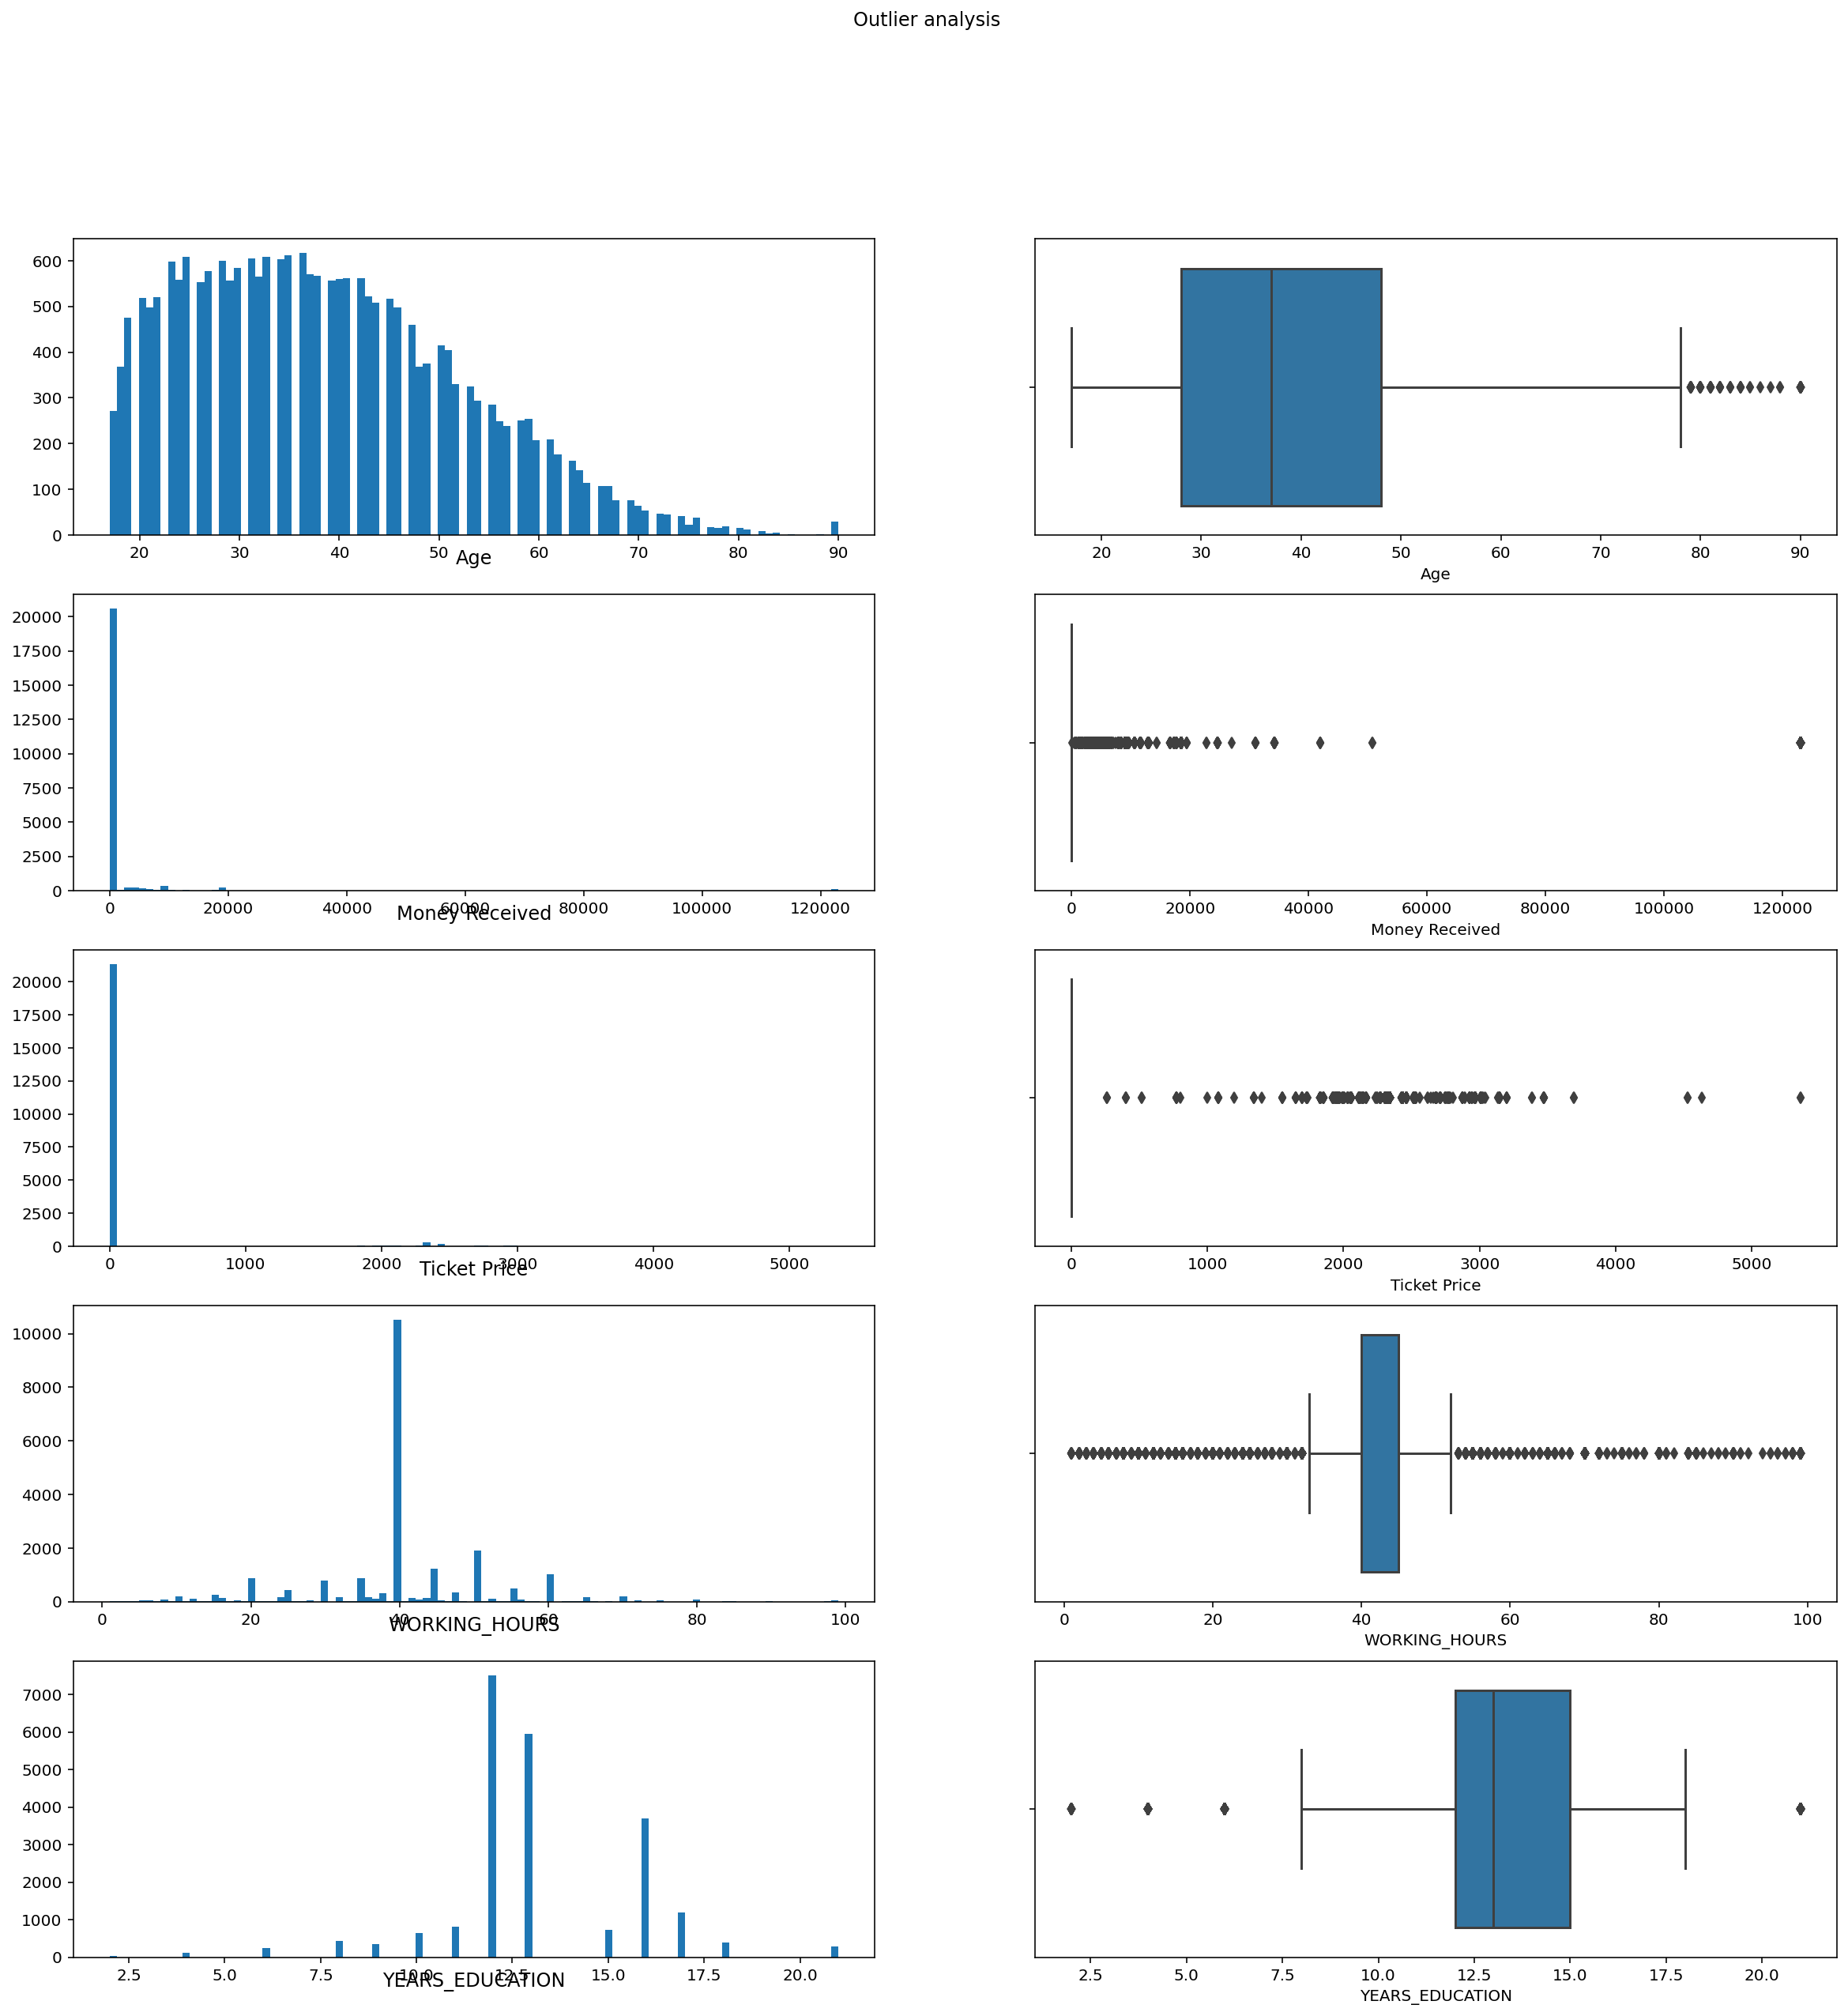

In [48]:
train_num = train[['YEARS_EDUCATION','WORKING_HOURS','Money Received','Ticket Price','Age']]
hist_box_maker(train_num,'Outlier analysis',5,20,20)

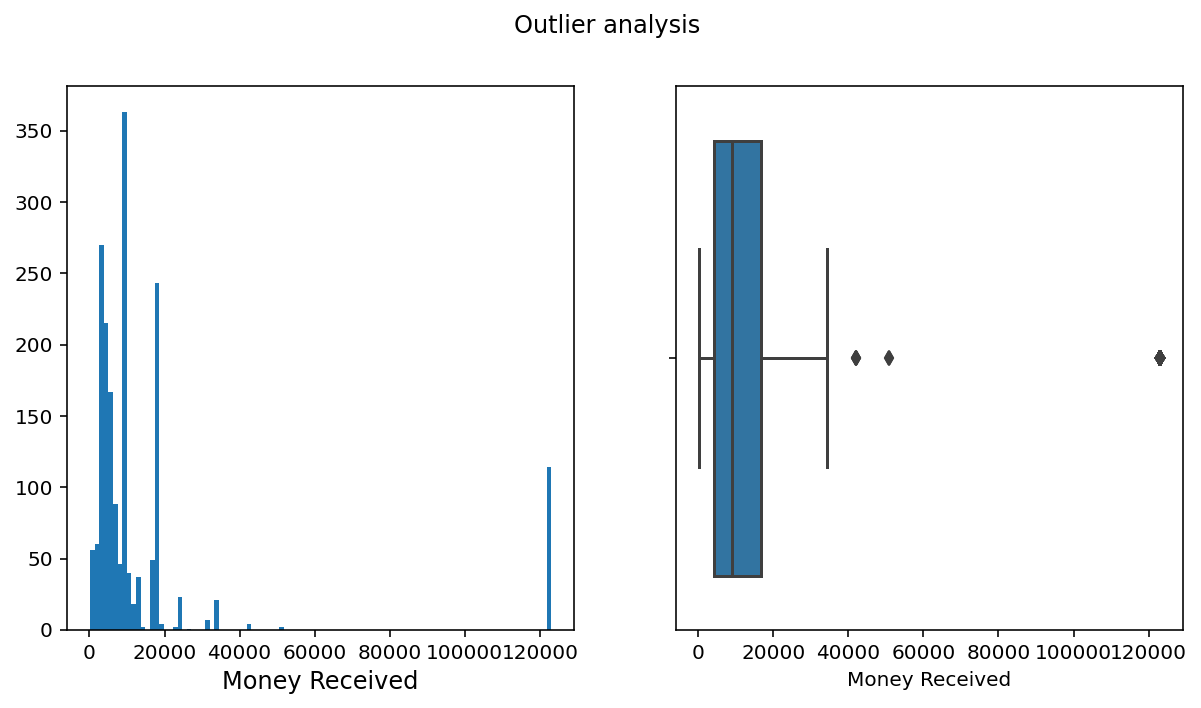

In [49]:
hist_box_maker(train_num[['Money Received']][(train_num['Money Received'] != 0)],'Outlier analysis',1,10,5)

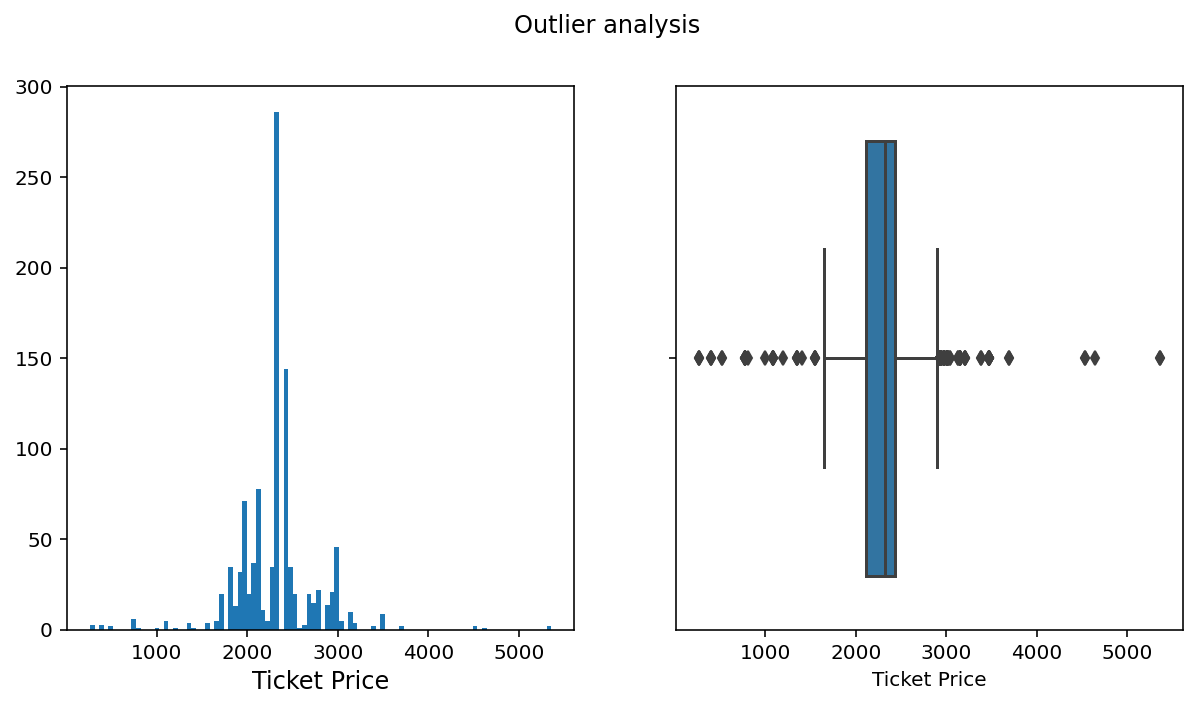

In [50]:
hist_box_maker(train_num[['Ticket Price']][(train['Ticket Price'] != 0)],'Outlier analysis',1,10,5)

In [51]:
filters_train = ((train['Age'] > 89) |
                  (train['Money Received'] > 30000) |
                  (train['Ticket Price'] > 4000) |
                  (train['WORKING_HOURS'] > 95) |
                  (train['YEARS_EDUCATION'] > 20))
train_out = train.copy()

In [52]:
train=train[(~(filters_train))]
train[(~(filters_train))].shape[0] /train.shape[0]

1.0

## **Spearman and Statistics Feature Selection**  

In [53]:
shapiro_test = stats.shapiro(train[['WORKING_HOURS', 'Money Received', 'Ticket Price', 'Age', 'INCOME','MONEY_TICKET']])
shapiro_test[1] #p-value
#we can see there is no statistical evidence of normality distribution in our numeric variables

0.0

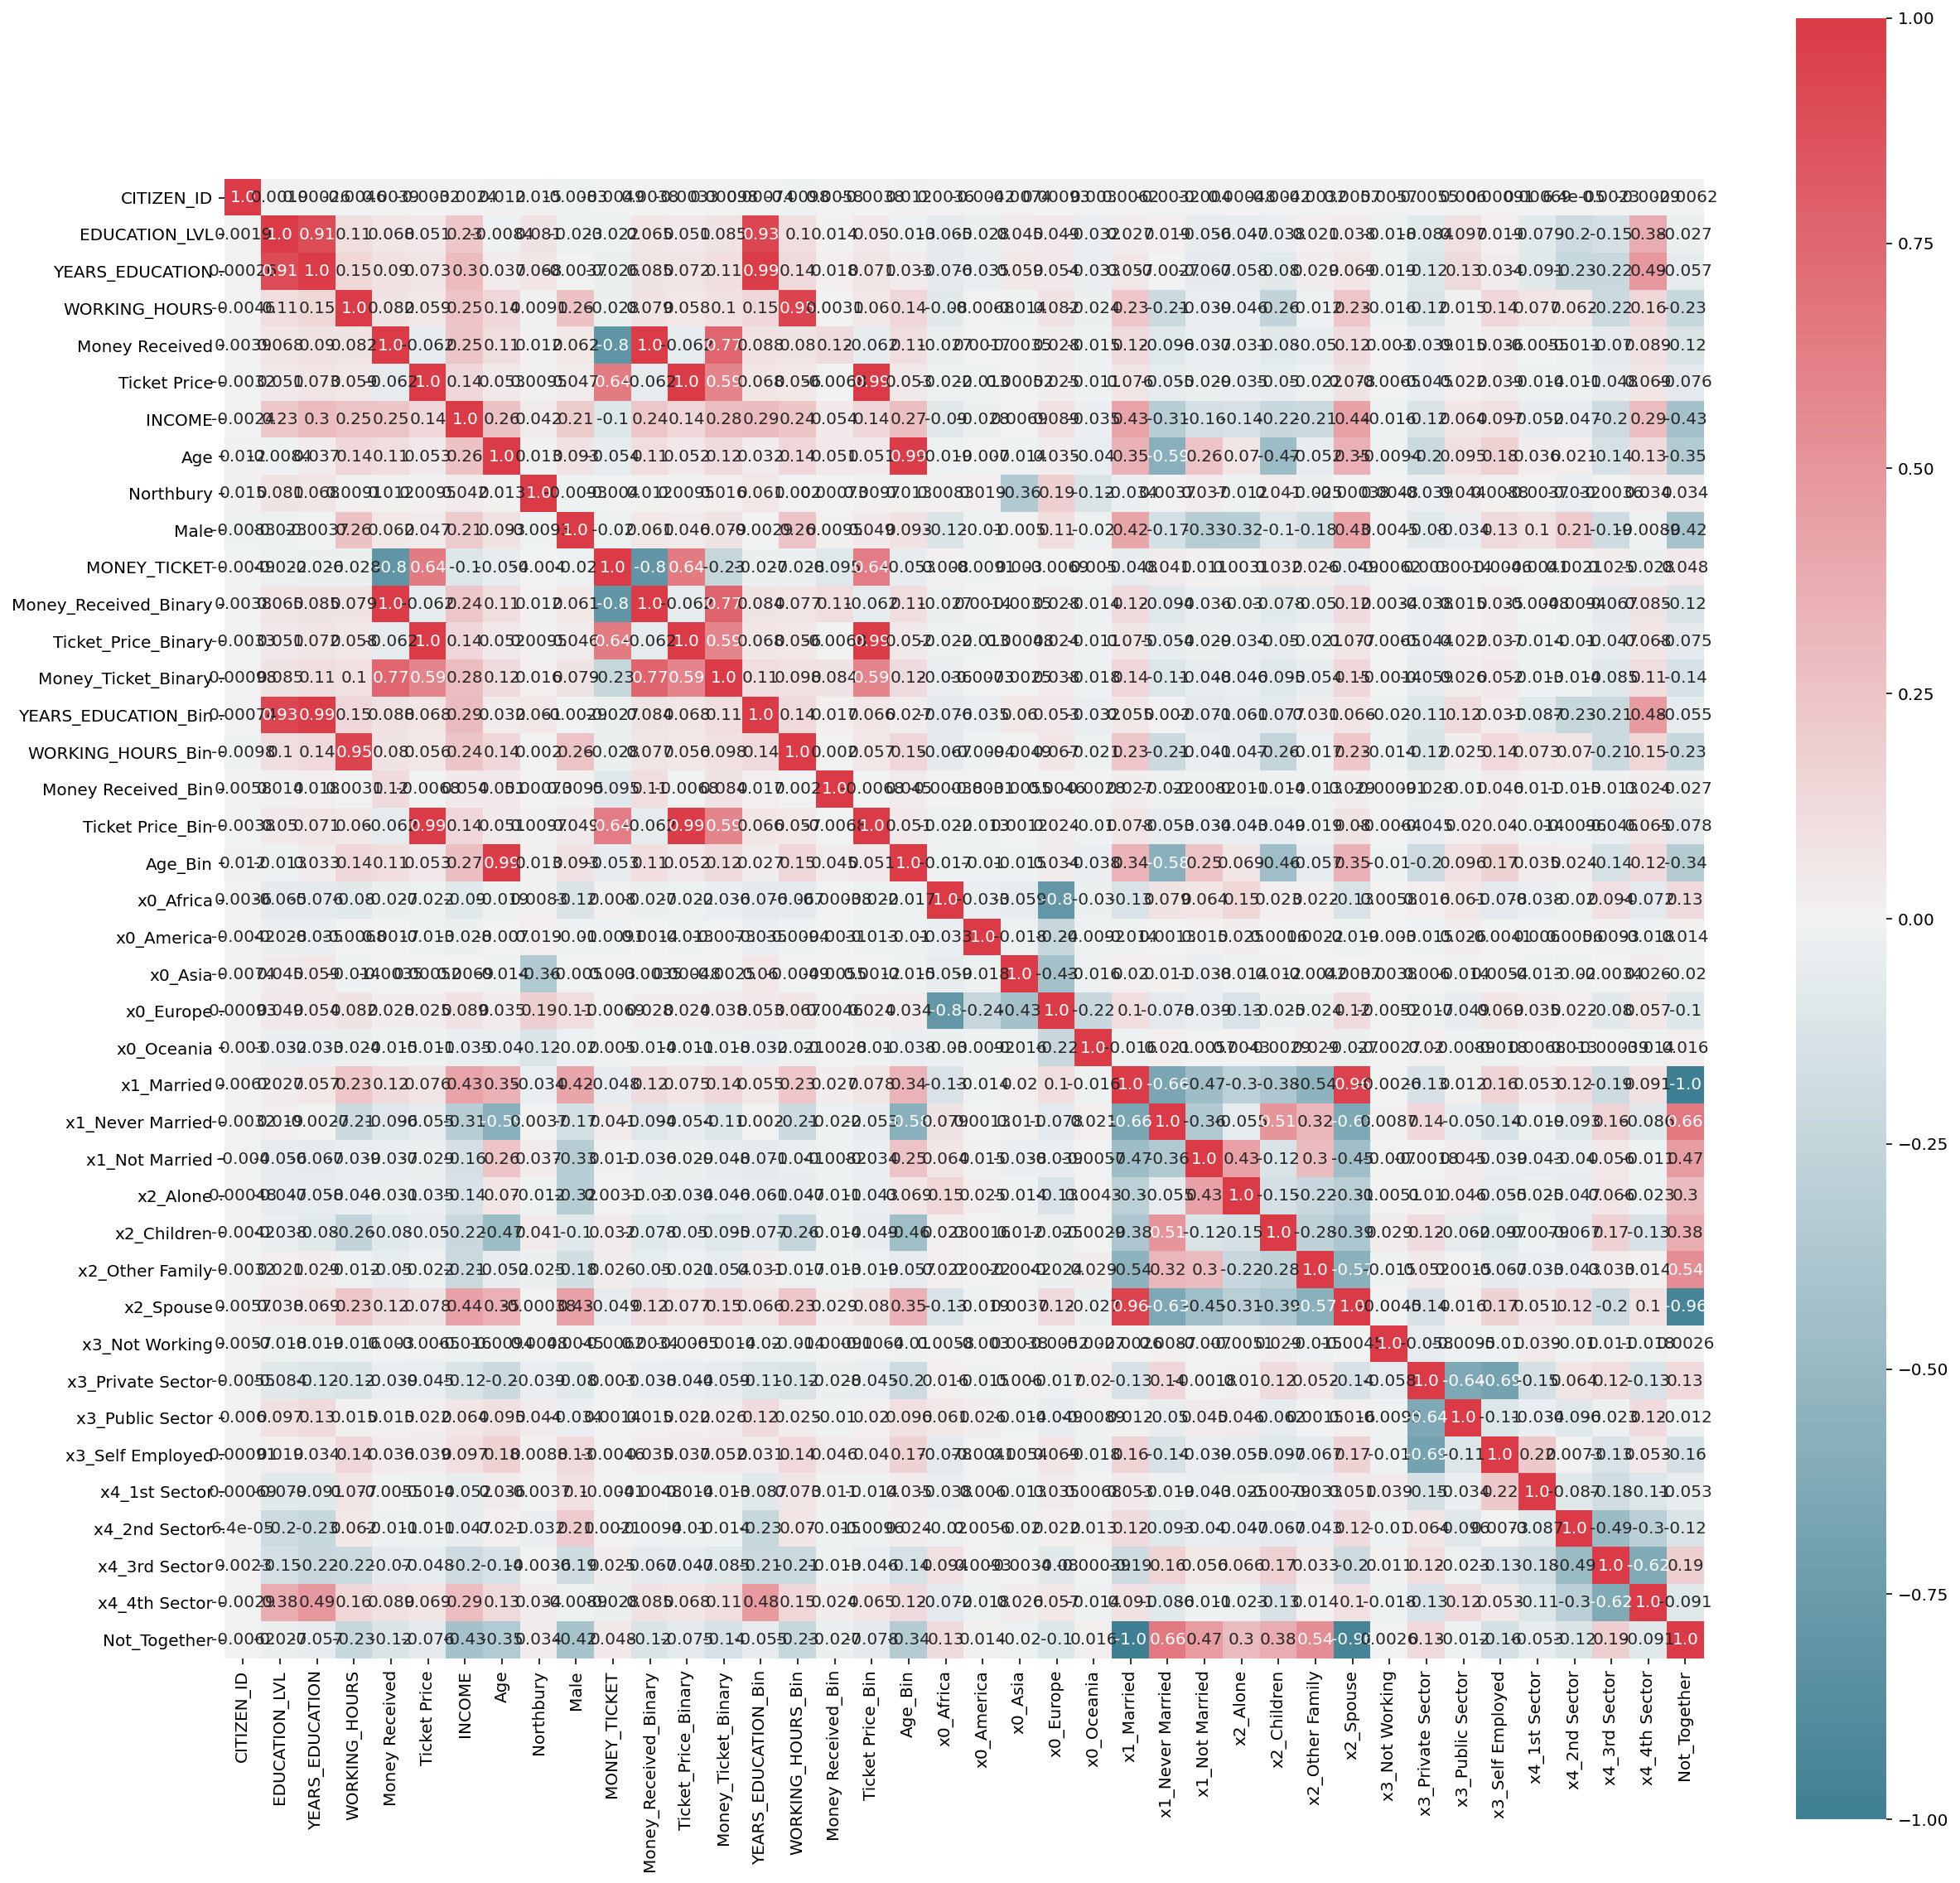

In [54]:
train_corr=train.corr(method = "spearman")
plt.figure(figsize=(20,20))
sns.heatmap(data = train_corr, annot = True, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt='.2',  vmin=-1, vmax=1, center=0,square=True )

In [55]:
train.drop(columns =["EDUCATION_LVL", "x1_Married", "CITIZEN_ID", "x0_Africa"], inplace = True)


binary = train.drop(columns = ['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price', 'Age', 'INCOME','MONEY_TICKET']).columns.to_list()
chi2_score, chi_2_p_value = chi2(train[binary], train['INCOME'])
f_score, f_p_value = f_classif(train[train.drop(columns=binary).columns.to_list()],train['INCOME'])
print('Binary Columns: ', train[binary].columns)
print('Metric Columns: ', train.drop(columns=binary).columns)
print('chi2 score        ', chi2_score)
print('chi2 p-value      ', chi_2_p_value)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)

Binary Columns:  Index(['Northbury', 'Male', 'Money_Received_Binary', 'Ticket_Price_Binary',
       'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin',
       'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin', 'x0_America',
       'x0_Asia', 'x0_Europe', 'x0_Oceania', 'x1_Never Married',
       'x1_Not Married', 'x2_Alone', 'x2_Children', 'x2_Other Family',
       'x2_Spouse', 'x3_Not Working', 'x3_Private Sector', 'x3_Public Sector',
       'x3_Self Employed', 'x4_1st Sector', 'x4_2nd Sector', 'x4_3rd Sector',
       'x4_4th Sector', 'Not_Together'],
      dtype='object')
Metric Columns:  Index(['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price',
       'INCOME', 'Age', 'MONEY_TICKET'],
      dtype='object')
chi2 score         [3.99889248e+00 3.17777129e+02 1.12743725e+03 4.18643727e+02
 1.52421659e+03 1.07106079e+03 5.98293614e+02 6.33069130e+01
 1.02872959e+03 1.76231082e+03 1.65434498e+01 1.01728526e+00
 2.55215433e+01 2.66817095e+01 1.42198600e+0

In [56]:
#variables to drop due to chi-squared
train.drop(columns =["Northbury", 'x0_Asia'], inplace = True)
#variables to drop due to multicollinearity
train.drop(columns =['x2_Alone', 'x4_3rd Sector', 'x3_Not Working'], inplace = True)

# **Train test Split**

In [57]:
#Kaggle Transformations
for i in ["Name", "Native Continent", "Marital Status", "Lives with", "Base Area", "Education Level", "Employment Sector", "Role"]:
    kaggle[i] = kaggle[i].astype("str")
    
questionmark_to_nan(kaggle, 'Base Area') 
questionmark_to_nan(kaggle, 'Employment Sector') 
questionmark_to_nan(kaggle, 'Role')

kaggle["YOB"] = kaggle['Birthday'].str.split(' ', n = 2, expand = True)[2].str.split(',', n = 1, expand = True)[1]
kaggle['YOB'] = kaggle['YOB'].astype('int64')
birthday_to_age(kaggle, 'YOB', 'Age')
kaggle.drop(columns = ['Birthday', 'YOB'], inplace = True)

kaggle['Northbury'] = kaggle['Base Area'].map(lambda x: 1 if x == 'Northbury' else 0)
kaggle.drop(columns = ['Base Area'], inplace = True)

kaggle['Gender'] = kaggle['Name'].str.split(' ', n = 1, expand = True)[0] 
kaggle['Male'] = kaggle['Gender'].map(lambda x: 1 if x == 'Mr.' else 0)
kaggle.drop(columns = ['Name', 'Gender'], inplace = True)

kaggle['Marital Status'] = kaggle['Marital Status'].map(lambda x: 'Married' if ((x == 'Married - Spouse Missing') | (x == 'Married - Spouse in the Army') ) else x)
kaggle['Marital Status'] = kaggle['Marital Status'].map(lambda x: 'Not Married' if ((x == 'Divorced')  | (x == 'Separated') | (x == 'Widow')) else x)
kaggle['Marital Status'] = kaggle['Marital Status'].map(lambda x: 'Never Married' if ((x == 'Single') ) else x)


kaggle['Lives with'] = kaggle['Lives with'].map(lambda x: 'Spouse' if ((x == 'Wife') | (x == 'Husband')) else x)
kaggle['Lives with'] = kaggle['Lives with'].map(lambda x: 'Other Family' if (x == 'Other relatives') else x)



kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'Masters' if ("Masters" in x) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'PostGraduation' if ("PostGraduation" in x) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'Incomplete High School' if ((x== "High School - 2nd Cycle") | (x== "High School - 1st Cycle")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'Less than Middle School' if ((x=="Middle School - 2nd Cycle") | (x== "Middle School - 1st Cycle") | (x== "Primary School") |(x== "Preschool" )) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: '<HighSchool' if ((x=="Incomplete High School") | (x== "Less than Middle School") | (x== "Middle School Complete")) else x)

kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF3 or less' if ((x=="<HighSchool")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF4' if ((x=="High School Complete")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF5' if ((x=="Professional School")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF6' if ((x=="Bachelors")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF7' if ((x=="Masters") | (x== "PostGraduation")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF8' if ((x=="PhD")) else x)

kaggle["Employment Sector"] = kaggle["Employment Sector"].astype("str")
kaggle["Employment Sector"]= kaggle["Employment Sector"].map(lambda x: 'Private Sector' if ("Private Sector" in x) else x)
kaggle["Employment Sector"]= kaggle["Employment Sector"].map(lambda x: 'Public Sector' if ("Public Sector" in x) else x)
kaggle["Employment Sector"]= kaggle["Employment Sector"].map(lambda x: 'Self Employed' if ("Self-Employed" in x) else x)
kaggle['Employment Sector'] = kaggle['Employment Sector'].map(lambda x: 'Not Working' if ((x=="Unemployed") | (x== "Never Worked")) else x)
kaggle['Employment Sector'] = kaggle['Employment Sector'].map(lambda x: np.nan if ((x=="nan")) else x)

kaggle["Role"]= kaggle["Role"].map(lambda x: '1st Sector' if ((x=="Agriculture and Fishing")) else x)
kaggle["Role"]= kaggle["Role"].map(lambda x: '2nd Sector' if ((x=="Repair & constructions") | (x== "Machine Operators & Inspectors"))else x)
kaggle["Role"]= kaggle["Role"].map(lambda x: '3rd Sector' if ((x== "Administratives")| (x== "Sales")| (x== "Other services")| (x== "Transports")| (x== "Cleaners & Handlers")| (x== "Household Services")| (x== "Security")| (x== "Army"))else x)
kaggle["Role"]= kaggle["Role"].map(lambda x: '4th Sector' if ((x=="IT") | (x== "Professor")| (x== "Management"))else x)

kaggle["MONEY_TICKET"] = kaggle["Money Received"].map(lambda x: -x ) + kaggle["Ticket Price"]
kaggle['Money_Received_Binary'] = kaggle['Money Received'].map(lambda x: 1 if x > 0 else 0)
kaggle['Ticket_Price_Binary'] = kaggle['Ticket Price'].map(lambda x: 1 if x > 0 else 0)
kaggle['Money_Ticket_Binary'] = kaggle['Money_Received_Binary'] + kaggle['Ticket_Price_Binary']

#Copy dataframe
mv_imputation = kaggle.copy()

#"Encode" the variables with missing values
mv_imputation['Employment Sector'] = mv_imputation['Employment Sector'].map(lambda x: 0 if (x == 'Private Sector')
                              else 1 if x == ('Public Sector')
                              else 2 if x == ('Self Employed')
                              else 3 if x == ('Not Working')
                              else x)

mv_imputation['Role'] = mv_imputation['Role'].map(lambda x: 0 if (x == '1st Sector')
                              else 1 if x == ('2nd Sector')
                              else 2 if x == ('3rd Sector')
                              else 3 if x == ('4th Sector')
                              else x)

independent_var = ['Years of Education', 'Working Hours per week', 'MONEY_TICKET', 'Age']

to_impute_ES = mv_imputation[independent_var][mv_imputation['Employment Sector'].isna()].copy()

to_impute_ES[to_impute_ES.columns.to_list()] = min_max_ES.transform(to_impute_ES)
 
to_impute_R = mv_imputation[independent_var][mv_imputation['Role'].isna()].copy()

to_impute_R[to_impute_R.columns.to_list()] = min_max_R.transform(to_impute_R)

#Impute the missing values

mv_imputation['Employment Sector'][mv_imputation['Employment Sector'].isna()] = nn_ES.predict(to_impute_ES[independent_var])
mv_imputation['Role'][mv_imputation['Role'].isna()] = nn_R.predict(to_impute_R[independent_var])


#Turn the values to their original categories
mv_imputation['Employment Sector'] = mv_imputation['Employment Sector'].map(lambda x: 'Private Sector' if (x == 0)
                              else 'Public Sector' if (x == 1)
                              else 'Self Employed' if (x == 2)
                              else 'Not Working' if (x == 3)
                              else x)

mv_imputation['Role'] = mv_imputation['Role'].map(lambda x: '1st Sector' if (x == 0)
                              else '2nd Sector' if (x == 1)
                              else '3rd Sector' if (x == 2)
                              else '4th Sector' if (x == 3)
                              else x)

kaggle = mv_imputation.copy()


kaggle["MONEY_TICKET"] = kaggle["Money Received"].map(lambda x: -x ) + kaggle["Ticket Price"]
kaggle['Money_Received_Binary'] = kaggle['Money Received'].map(lambda x: 1 if x > 0 else 0)
kaggle['Ticket_Price_Binary'] = kaggle['Ticket Price'].map(lambda x: 1 if x > 0 else 0)
kaggle['Money_Ticket_Binary'] = kaggle['Money_Received_Binary'] + kaggle['Ticket_Price_Binary']


one_hot_var = ohe(kaggle, ['Native Continent', 'Marital Status', 'Lives with', "Employment Sector", "Role"])
kaggle = pd.concat([kaggle.drop(columns = ['Native Continent', 'Marital Status', 'Lives with', "Employment Sector", "Role"]), one_hot_var], axis = 1)
encoder= ce.OrdinalEncoder(cols=['Education Level'],return_df=True, mapping=[{'col':'Education Level','mapping':{'EQF3 or less':0,'EQF4':1,'EQF5':2,'EQF6':3,'EQF7':4,'EQF8':5}}])
kaggle = encoder.fit_transform(kaggle)

kaggle["Not_Together"] = kaggle[["x1_Not Married", 'x1_Never Married']].sum(axis=1)


kaggle = kaggle.rename(columns={"Native Continent": "CONTINENT", "Lives with": "LIVES_WITH", 'Education Level': "EDUCATION_LVL",
                      'Years of Education': "YEARS_EDUCATION", 'Employment Sector': "EMPLOY_SECTOR", 'Role': "ECON_SECTOR",
                      'Working Hours per week': "WORKING_HOURS", 'Income': "INCOME",'Marital Status': "MARITAL_STATUS" })

kaggle.drop(columns =["EDUCATION_LVL", "x1_Married", "CITIZEN_ID", "x0_Africa"], inplace = True)
kaggle.drop(columns =["Northbury", 'x0_Asia'], inplace = True)
kaggle.drop(columns =['x2_Alone', 'x4_3rd Sector', 'x3_Not Working'], inplace = True)


kaggle['YEARS_EDUCATION_Bin'] = YEARS_EDUCATION_Bin.transform(kaggle[['YEARS_EDUCATION']])
kaggle['WORKING_HOURS_Bin'] = WORKING_HOURS_Bin.transform(kaggle[['WORKING_HOURS']])
kaggle['Money Received_Bin'] = Money_Received_Bin.transform(kaggle[['Money Received']])
kaggle['Ticket Price_Bin'] = Ticket_Price_Bin.transform(kaggle[['Ticket Price']])
kaggle['Age_Bin'] = Age_Bin.transform(kaggle[['Age']])

In [58]:
X = train.drop(columns = ['INCOME'])
y = train['INCOME']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.40, stratify = y, random_state = 15)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, stratify = y_val, random_state = 15)

#Min max scaling
min_max = MinMaxScaler().fit(X_train)
X_train[X_train.columns.to_list()] = min_max.transform(X_train)
X_val[X_val.columns.to_list()] = min_max.transform(X_val) 
X_test[X_test.columns.to_list()] = min_max.transform(X_test)
kaggle[kaggle.columns.to_list()] = min_max.transform(kaggle)

In [59]:
X_train_Original = X_train.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_val_Original = X_val.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_test_Original = X_test.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])

X_train_MTB = X_train.drop(columns = ['Money Received', 'Ticket Price', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_val_MTB = X_val.drop(columns = ['Money Received', 'Ticket Price', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_test_MTB = X_test.drop(columns = ['Money Received', 'Ticket Price', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])

X_train_MT = X_train.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_val_MT = X_val.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_test_MT = X_test.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])

X_train_Bin = X_train.drop(columns = ['Money Received', 'Ticket Price', 'Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION', 'WORKING_HOURS', 'Age','Not_Together'])
X_val_Bin = X_val.drop(columns = ['Money Received', 'Ticket Price', 'Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION', 'WORKING_HOURS', 'Age','Not_Together'])
X_test_Bin = X_test.drop(columns = ['Money Received', 'Ticket Price', 'Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION', 'WORKING_HOURS', 'Age','Not_Together'])

In [60]:
X_train_FirstTry = X_train_Original.drop(columns = ['x0_Oceania', 'x0_America', 'x1_Not Married', 'x3_Private Sector', 'x4_2nd Sector'])
X_train_MTB_FirstTry = X_train_MTB.drop(columns = ['x0_Oceania', 'x0_America', 'x1_Not Married', 'x3_Private Sector', 'x4_2nd Sector'])
X_train_SecondTry = X_train_Original[['Money Received', 'YEARS_EDUCATION', 'Ticket Price', 'WORKING_HOURS', 'Age', 'x4_4th Sector', 'x2_Spouse', 'x4_1st Sector', 'x2_Children', 'x2_Other Family', 'Male', 'x3_Private Sector']]
X_train_MT_SecondTry = X_train_MT[['Money_Ticket_Binary', 'YEARS_EDUCATION', 'WORKING_HOURS', 'Age', 'x4_4th Sector', 'x2_Spouse', 'x4_1st Sector', 'x2_Children', 'x2_Other Family', 'Male', 'x3_Private Sector']]
X_train_ThirdTry = X_train_Original[['Money Received', 'YEARS_EDUCATION', 'Ticket Price', 'WORKING_HOURS', 'x4_4th Sector', 'x2_Spouse']]
X_train_V2_SecondTry = X_train_Original

X_val_FirstTry = X_val_Original[X_train_FirstTry.columns.to_list()]
X_val_MTB_FirstTry = X_val_MTB[X_train_MTB_FirstTry.columns.to_list()]
X_val_SecondTry = X_val_Original[X_train_SecondTry.columns.to_list()]
X_val_MT_SecondTry = X_val_MT[X_train_MT_SecondTry.columns.to_list()]
X_val_ThirdTry = X_val_Original[X_train_ThirdTry.columns.to_list()]
X_val_V2_SecondTry = X_val_Original[X_train_V2_SecondTry.columns.to_list()]

# **Feature Selection**


In [61]:
binary_original = X_train_Original.drop(columns = ['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price', 'Age']).columns.to_list()

### **Wrapper Method**

In [62]:
N = 1
model_rfe = LogisticRegression(random_state = 5)
rfe = RFE(estimator = model_rfe, n_features_to_select = N)
X_rfe = rfe.fit_transform(X = X_train_Original[binary_original], y = y_train) 

selected_features_rfe = pd.Series(rfe.ranking_, index = X_train_Original[binary_original].columns)
selected_features_rfe.sort_values()

x2_Spouse             1
x2_Children           2
x4_4th Sector         3
x0_Oceania            4
x4_1st Sector         5
x0_America            6
x1_Never Married      7
x2_Other Family       8
Male                  9
x1_Not Married       10
x3_Public Sector     11
x0_Europe            12
x4_2nd Sector        13
x3_Self Employed     14
x3_Private Sector    15
dtype: int64

In [63]:
N = 1
model_rfe = LogisticRegression(random_state = 5)
rfe = RFE(estimator = model_rfe, n_features_to_select = N)
X_rfe = rfe.fit_transform(X = X_train_Original.drop(columns=X_train_Original[binary_original]), y = y_train) 

selected_features_rfe = pd.Series(rfe.ranking_, index = X_train_Original.drop(columns=X_train_Original[binary_original]).columns)
selected_features_rfe.sort_values()

Money Received     1
YEARS_EDUCATION    2
WORKING_HOURS      3
Age                4
Ticket Price       5
dtype: int64

### **Intrinsic Methods**


#### Decision Tree Classifier - gini and entropy - binary variables

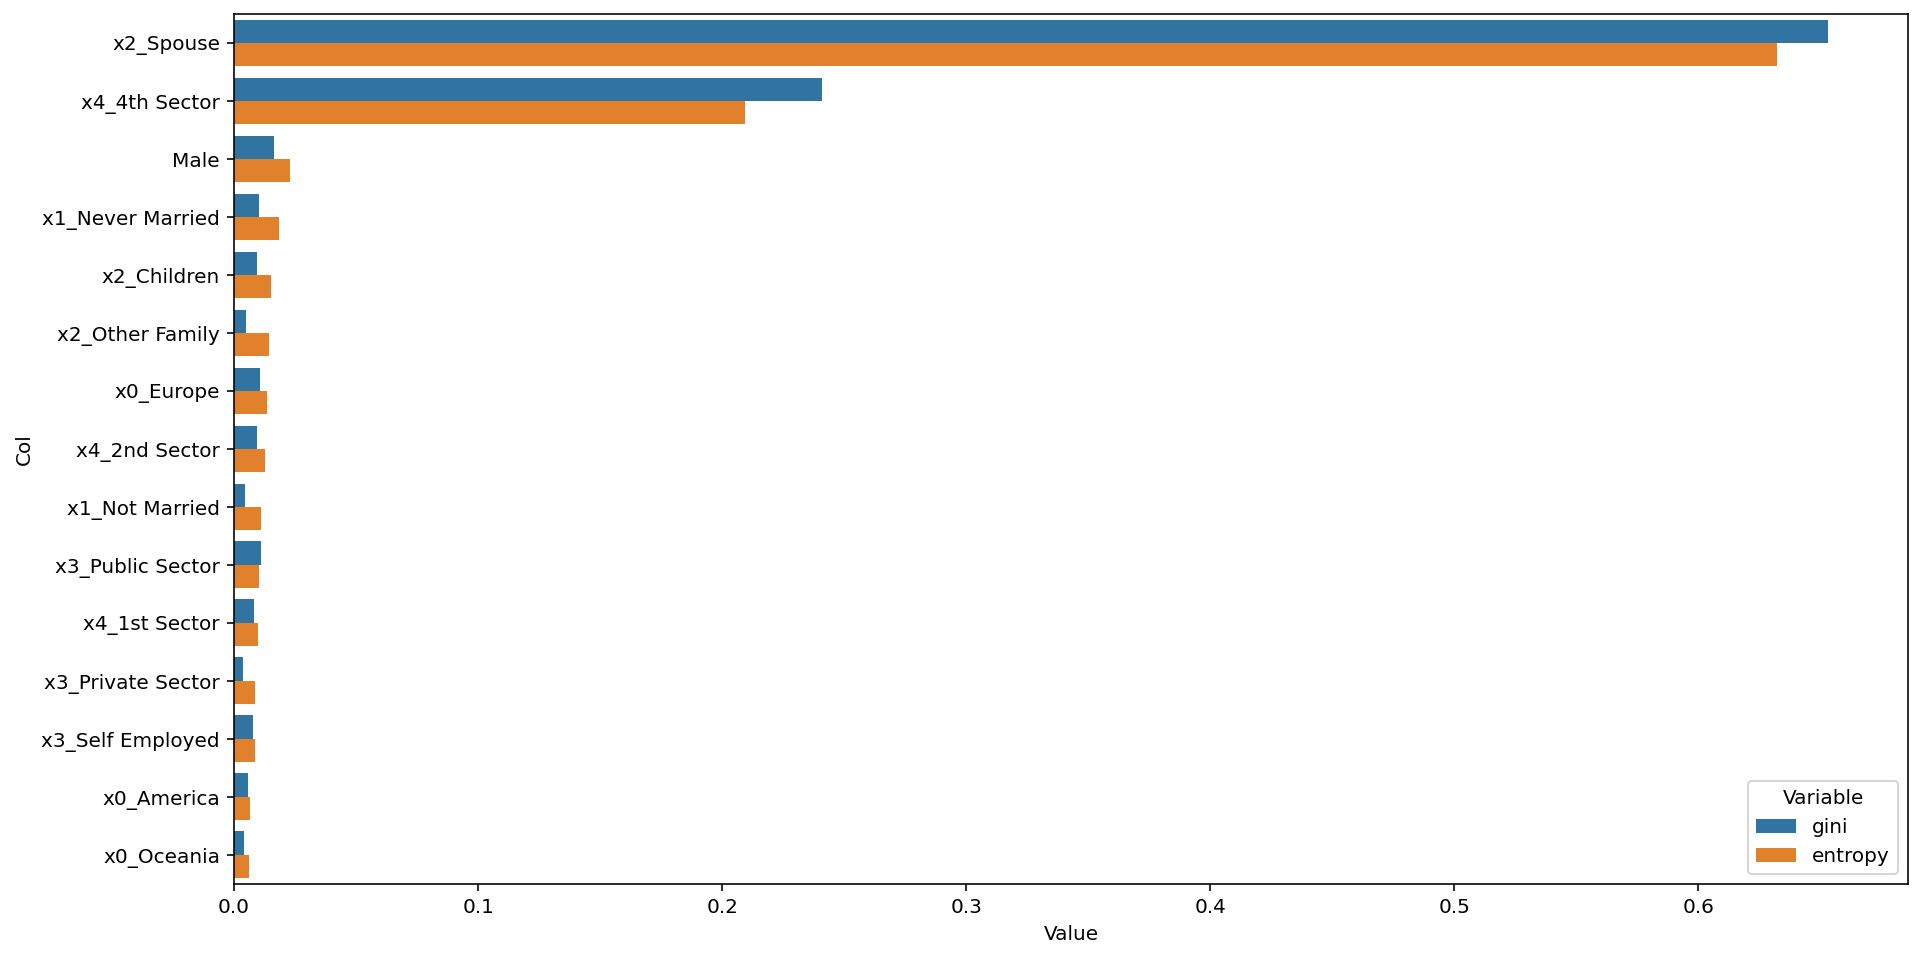

In [64]:
gini_importance = DecisionTreeClassifier().fit(X_train_Original[binary_original], y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_Original[binary_original], y_train).feature_importances_

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_Original[binary_original].columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### Decision Tree Classifier - gini and entropy - numerical variables

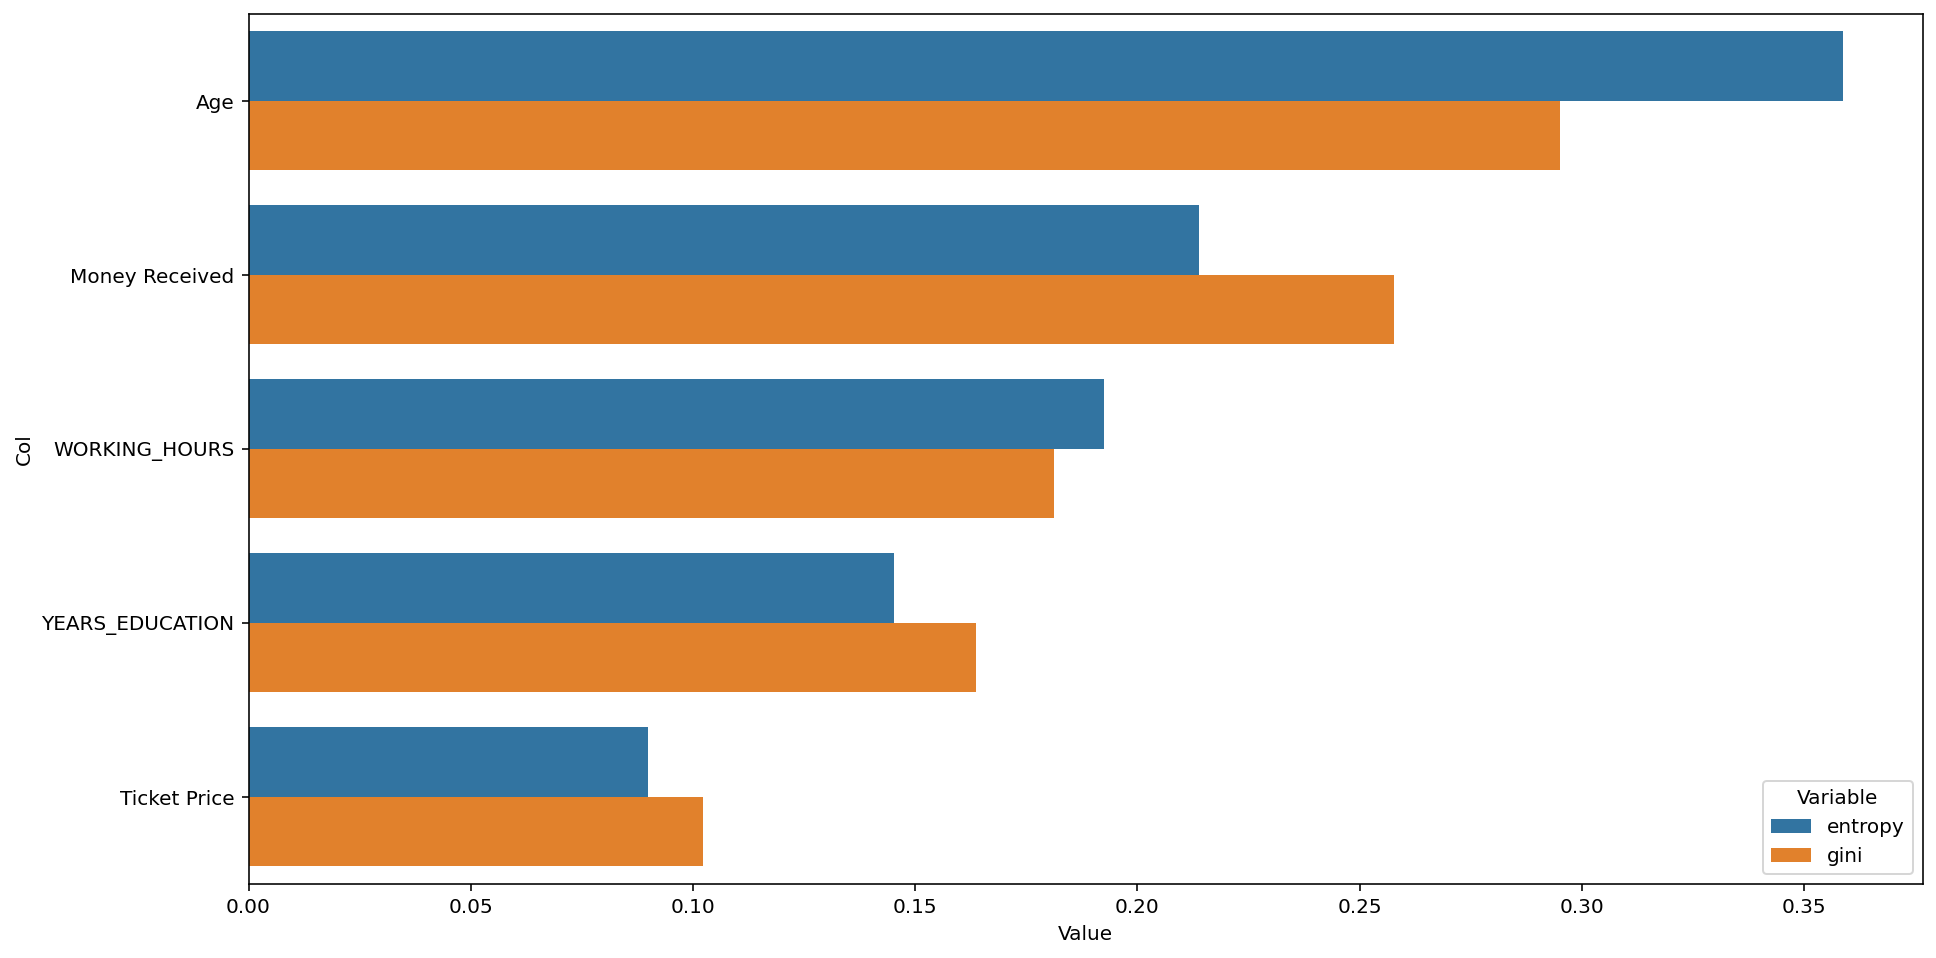

In [65]:
gini_importance = DecisionTreeClassifier().fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train).feature_importances_

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_Original.drop(columns=X_train_Original[binary_original]).columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### Random Forest Classifier - gini and entropy - binary variables

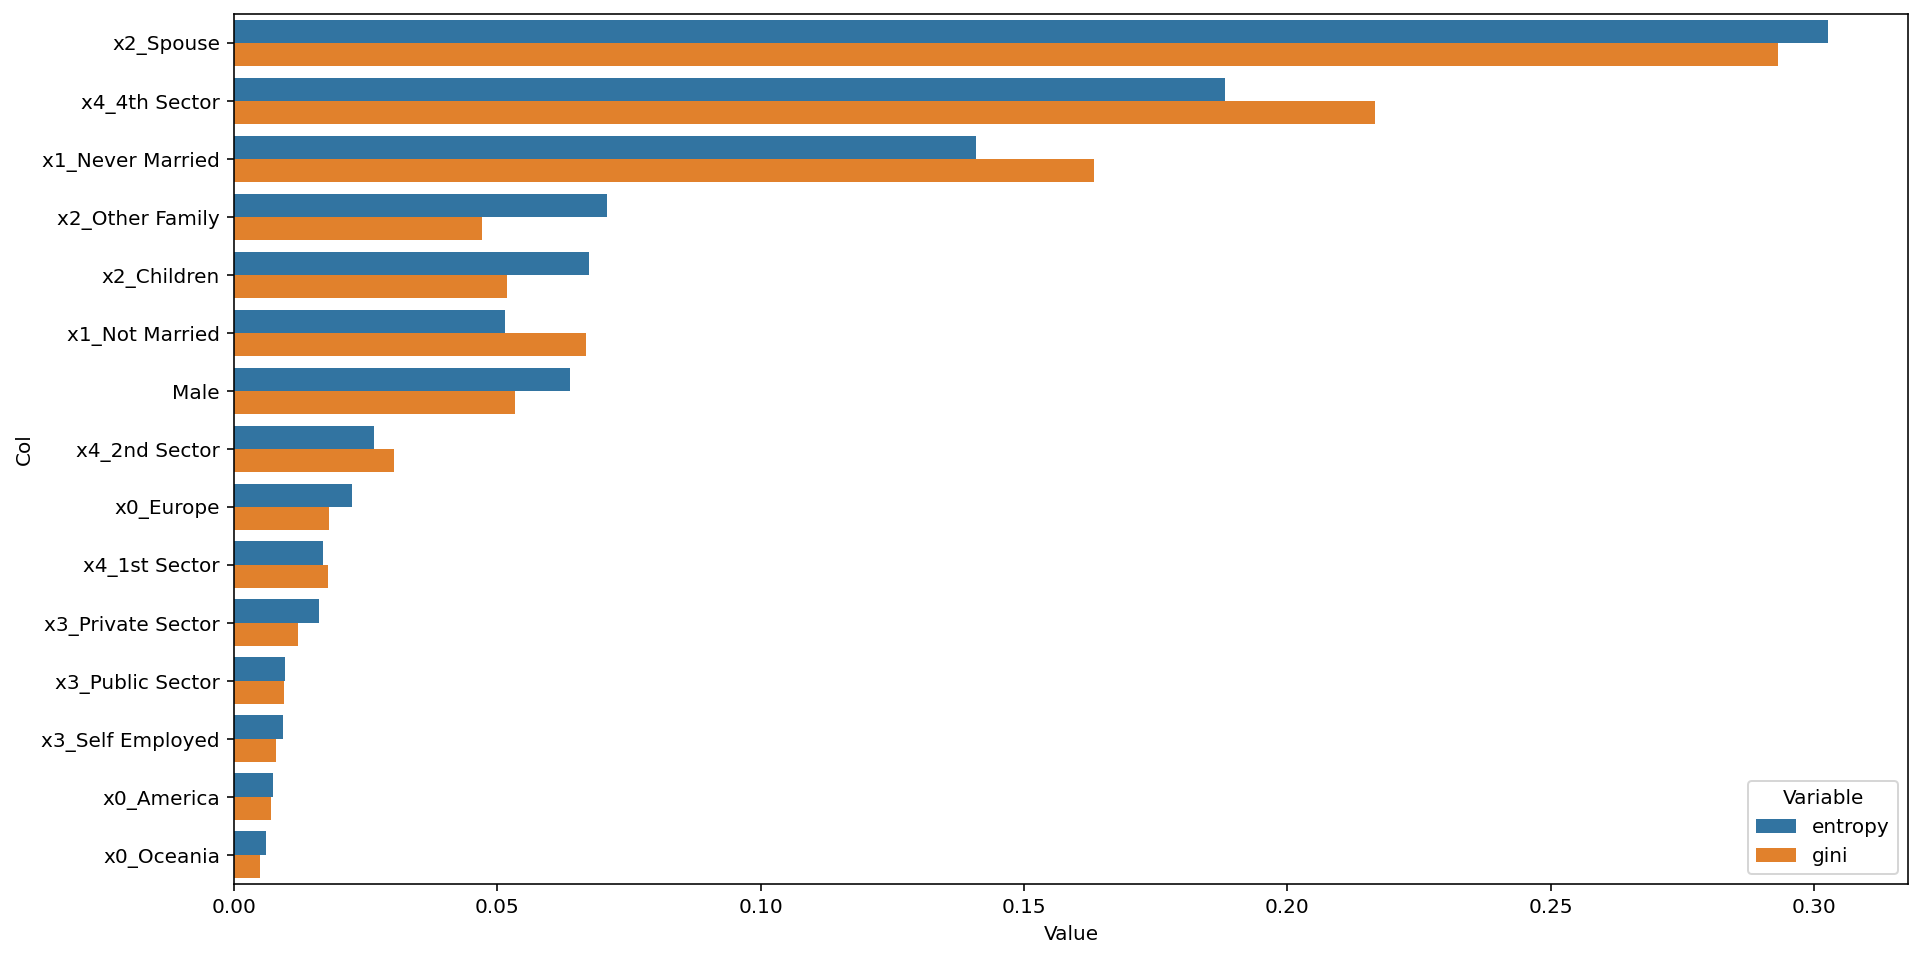

In [66]:
gini_importanceRF = RandomForestClassifier().fit(X_train_Original[binary_original], y_train).feature_importances_
entropy_importanceRF = RandomForestClassifier(criterion='entropy').fit(X_train_Original[binary_original], y_train).feature_importances_

zippy = pd.DataFrame(zip(gini_importanceRF, entropy_importanceRF), columns = ['gini','entropy'])
zippy['col'] = X_train_Original[binary_original].columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### Random Forest Classifier - gini and entropy - numerical variables

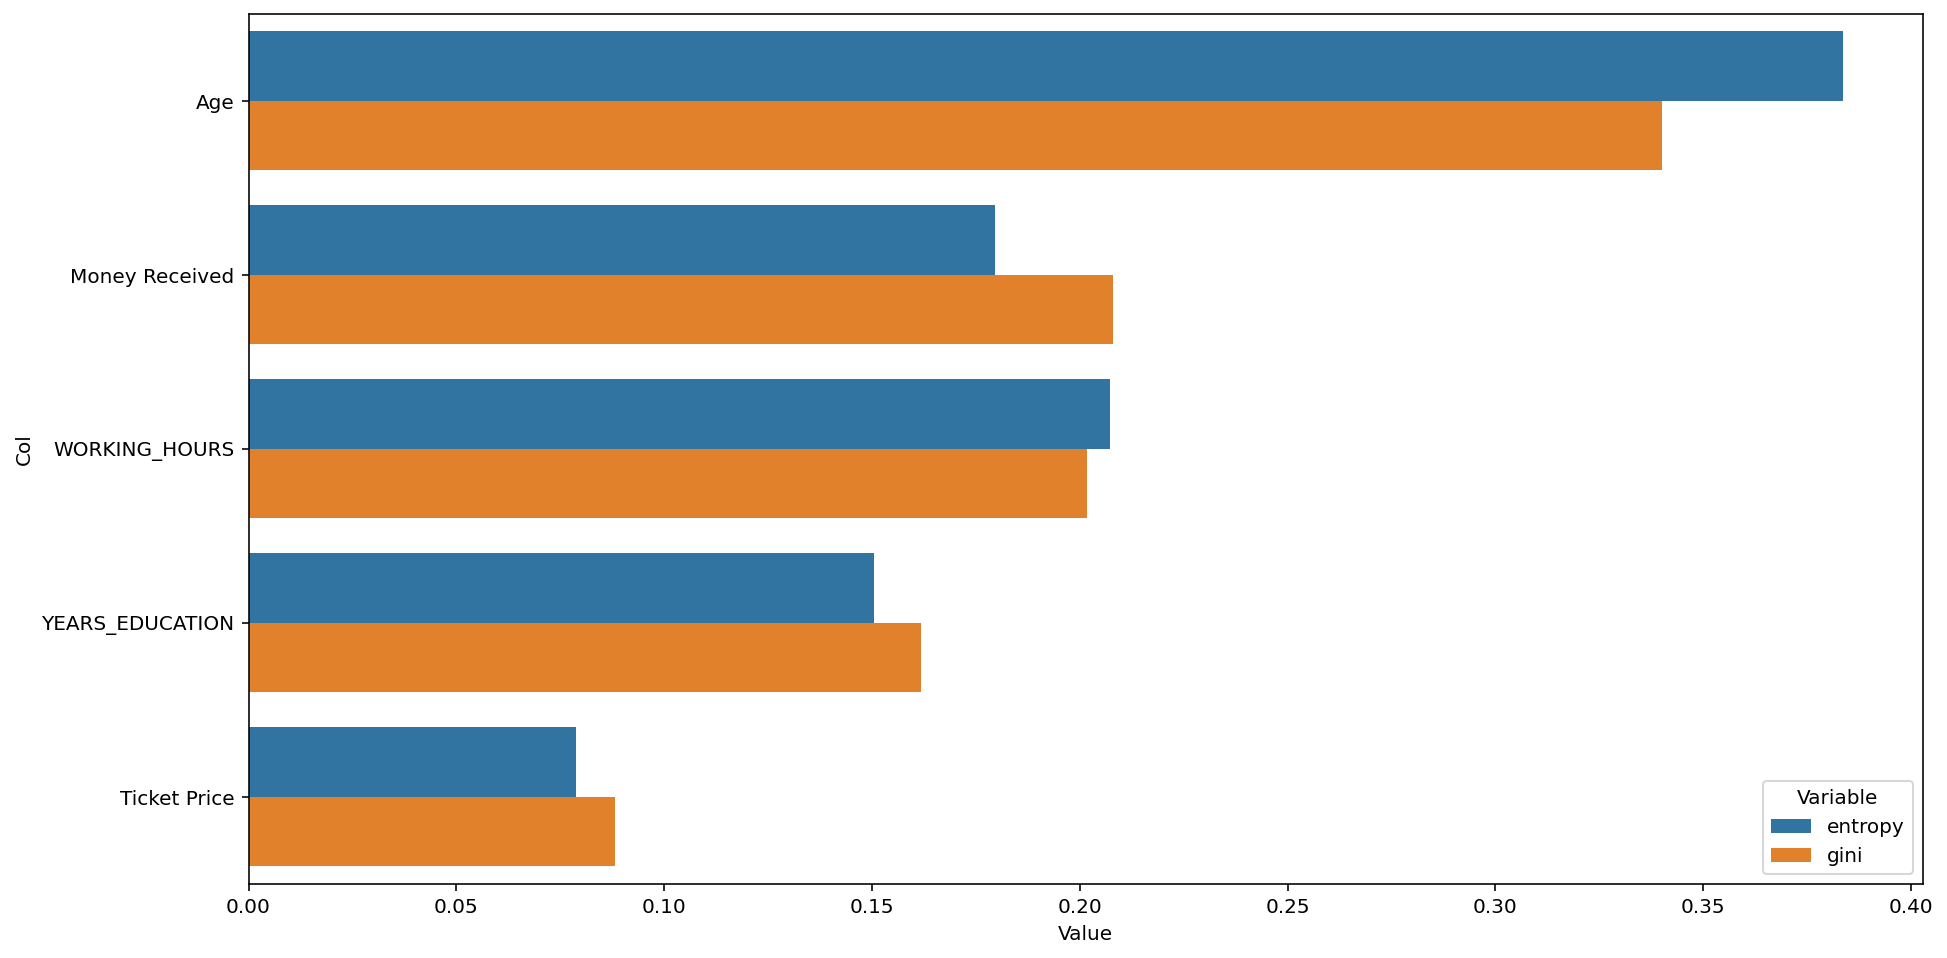

In [67]:
gini_importanceRF = RandomForestClassifier().fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train).feature_importances_
entropy_importanceRF = RandomForestClassifier(criterion='entropy').fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train).feature_importances_

zippy = pd.DataFrame(zip(gini_importanceRF, entropy_importanceRF), columns = ['gini','entropy'])
zippy['col'] = X_train_Original.drop(columns=X_train_Original[binary_original]).columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

### **Embbeded Methods**


#### Lasso - numerical variables

In [68]:
#Feature selction using Lasso
Lasso_Best_Alpha = LassoCV(cv = 10, random_state = 2)
Lasso_Best_Alpha = Lasso_Best_Alpha.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)

Lasso_Best_Alpha.alpha_

1.7944099907951893e-05

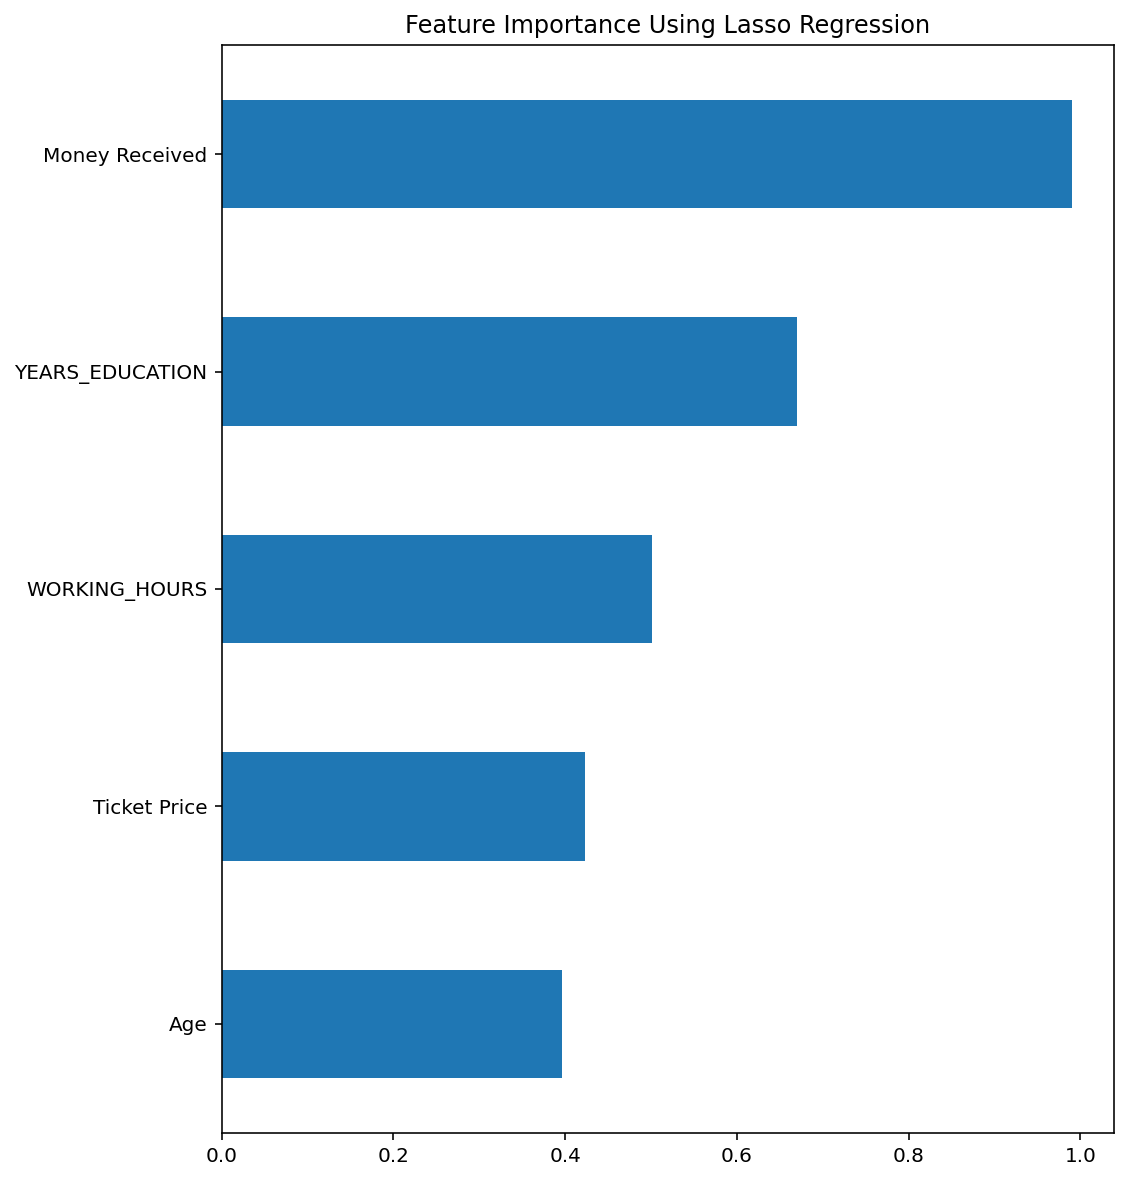

In [69]:
Lasso_Reg = Lasso(alpha = Lasso_Best_Alpha.alpha_, random_state = 2)
Lasso_Reg.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)
coef_Lasso = pd.Series(Lasso_Reg.coef_, index = X_train_Original.drop(columns=X_train_Original[binary_original]).columns)
coef_Lasso.sort_values()
plot_importance(coef_Lasso, 'Lasso')

#### Lasso - binary variables

In [70]:
#Feature selction trough Lasso
Lasso_Best_Alpha = LassoCV(cv = 10, random_state = 2)
Lasso_Best_Alpha = Lasso_Best_Alpha.fit(X_train_Original[binary_original], y_train)

Lasso_Best_Alpha.alpha_

9.121661892968917e-05

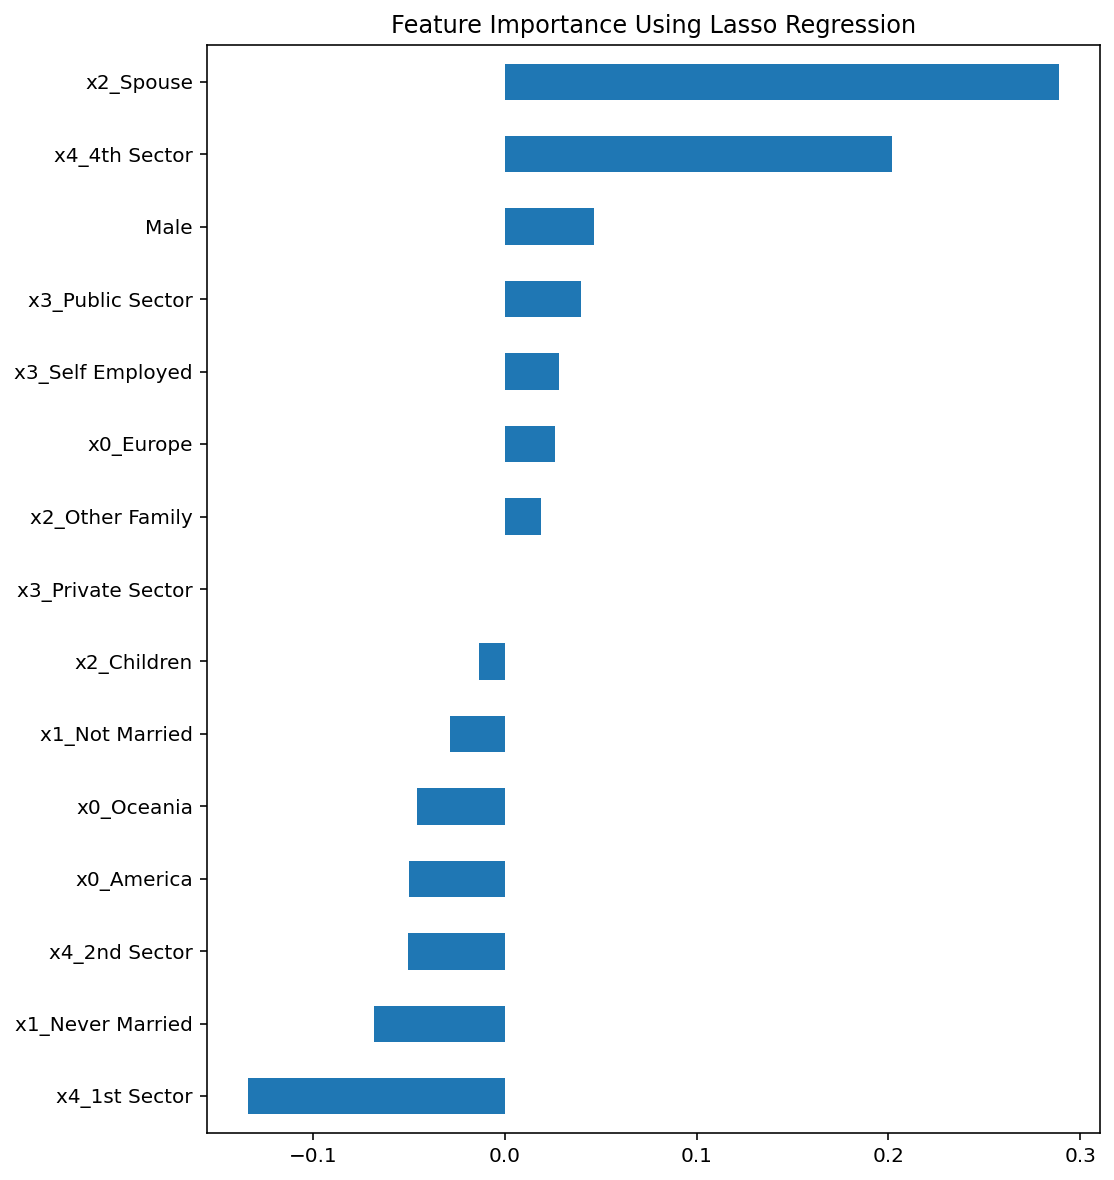

In [71]:
Lasso_Reg = Lasso(alpha = Lasso_Best_Alpha.alpha_, random_state = 2)
Lasso_Reg.fit(X_train_Original[binary_original], y_train)
coef_Lasso = pd.Series(Lasso_Reg.coef_, index = X_train_Original[binary_original].columns)
coef_Lasso.sort_values()
plot_importance(coef_Lasso, 'Lasso')

#### Ridge - numerical variables

Best alpha for Ridge: 0.1


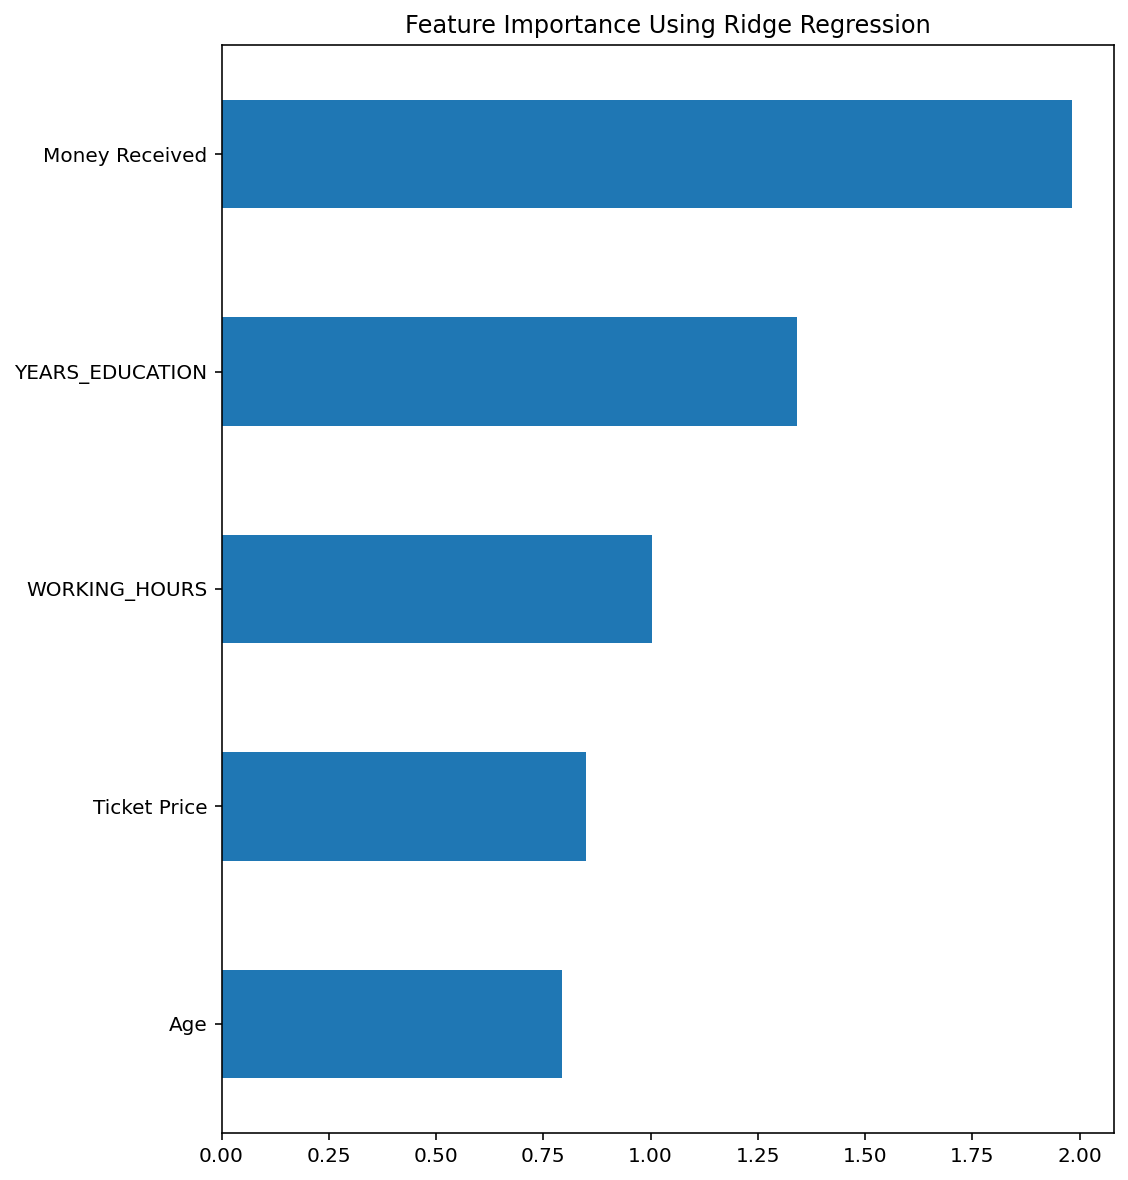

In [72]:
ridge_alphas = np.linspace(0.1,100, num= 100)
Ridge_Best_Alpha = RidgeClassifierCV(alphas = ridge_alphas, cv = 10)
Ridge_Best_Alpha = Ridge_Best_Alpha.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)

print('Best alpha for Ridge:', Ridge_Best_Alpha.alpha_)
Ridge = RidgeClassifier(alpha = Ridge_Best_Alpha.alpha_, random_state = 2)
Ridge = Ridge.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)

coef_Ridge = pd.Series(Ridge.coef_[0], index = X_train_Original.drop(columns=X_train_Original[binary_original]).columns)
coef_Ridge.sort_values()
plot_importance(coef_Ridge, 'Ridge')

#### Ridge - binary variables

Best alpha for Ridge: 1.1090909090909091


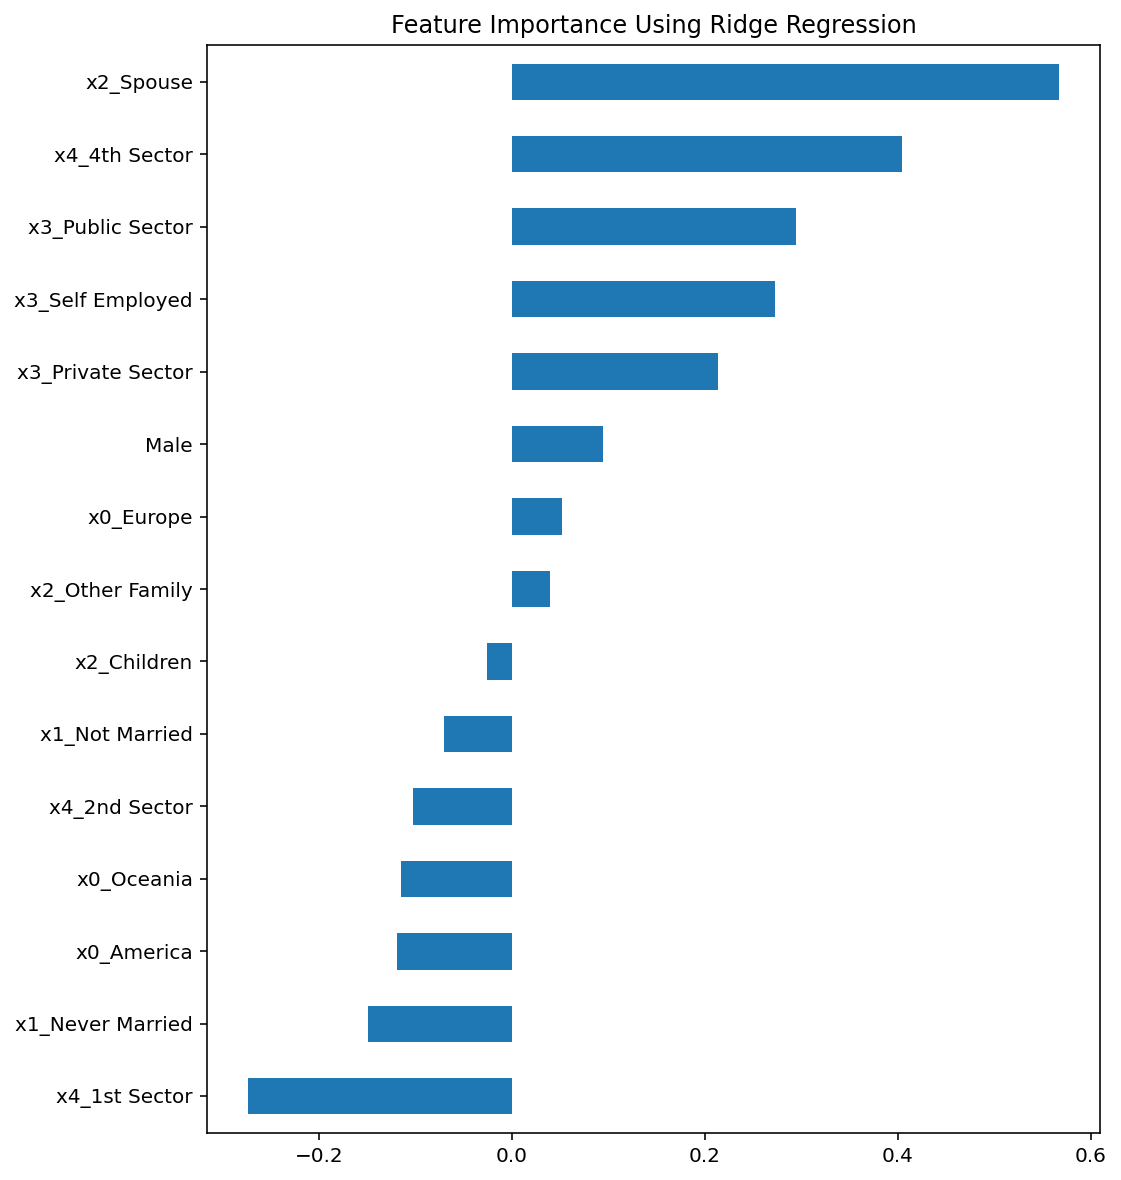

In [73]:
ridge_alphas = np.linspace(0.1,100, num= 100)
Ridge_Best_Alpha = RidgeClassifierCV(alphas = ridge_alphas, cv = 10)
Ridge_Best_Alpha = Ridge_Best_Alpha.fit(X_train_Original[binary_original], y_train)

print('Best alpha for Ridge:', Ridge_Best_Alpha.alpha_)
Ridge = RidgeClassifier(alpha = Ridge_Best_Alpha.alpha_, random_state = 2)
Ridge = Ridge.fit(X_train_Original[binary_original], y_train)

coef_Ridge = pd.Series(Ridge.coef_[0], index = X_train_Original[binary_original].columns)
coef_Ridge.sort_values()
plot_importance(coef_Ridge, 'Ridge')

#### Elastic Net - numerical variables

In [74]:
ElasticNet_Best_L1_Alpha = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1], cv = 10, random_state = 2) 
ElasticNet_Best_L1_Alpha = ElasticNet_Best_L1_Alpha.fit(X_train_Original, y_train)

print(ElasticNet_Best_L1_Alpha.l1_ratio_) #Best l1
print(ElasticNet_Best_L1_Alpha.alpha_)#Best alpha

1.0
9.121661892968917e-05


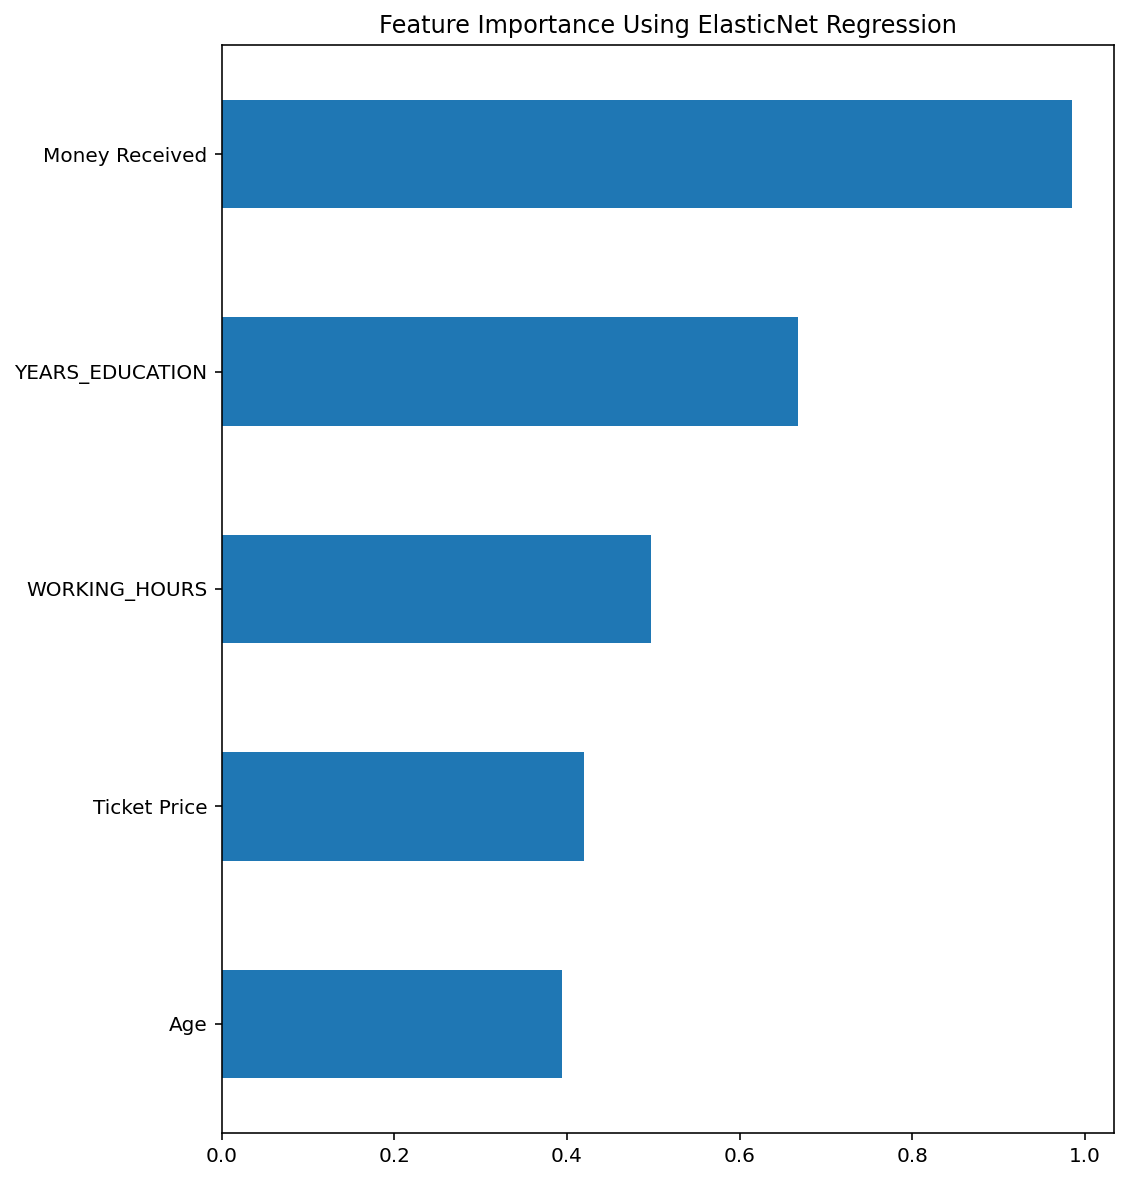

In [75]:
ElasticNet_Reg = ElasticNet(l1_ratio = ElasticNet_Best_L1_Alpha.l1_ratio_, alpha = ElasticNet_Best_L1_Alpha.alpha_, random_state = 2)
ElasticNet_Reg.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)
coef_ElasticNet = pd.Series(ElasticNet_Reg.coef_, index = X_train_Original.drop(columns=X_train_Original[binary_original]).columns)
coef_ElasticNet.sort_values()
plot_importance(coef_ElasticNet, 'ElasticNet')

#### Elastic Net - binary variables

In [76]:
ElasticNet_Best_L1_Alpha = ElasticNetCV(l1_ratio = [0.0001,.1, .5, .7, .9, .95, .99, 1], cv = 10, random_state = 2) 
ElasticNet_Best_L1_Alpha = ElasticNet_Best_L1_Alpha.fit(X_train_Original[binary_original], y_train)

print(ElasticNet_Best_L1_Alpha.l1_ratio_) #Best l1
print(ElasticNet_Best_L1_Alpha.alpha_)#Best alpha

0.5
0.00018243323785937837


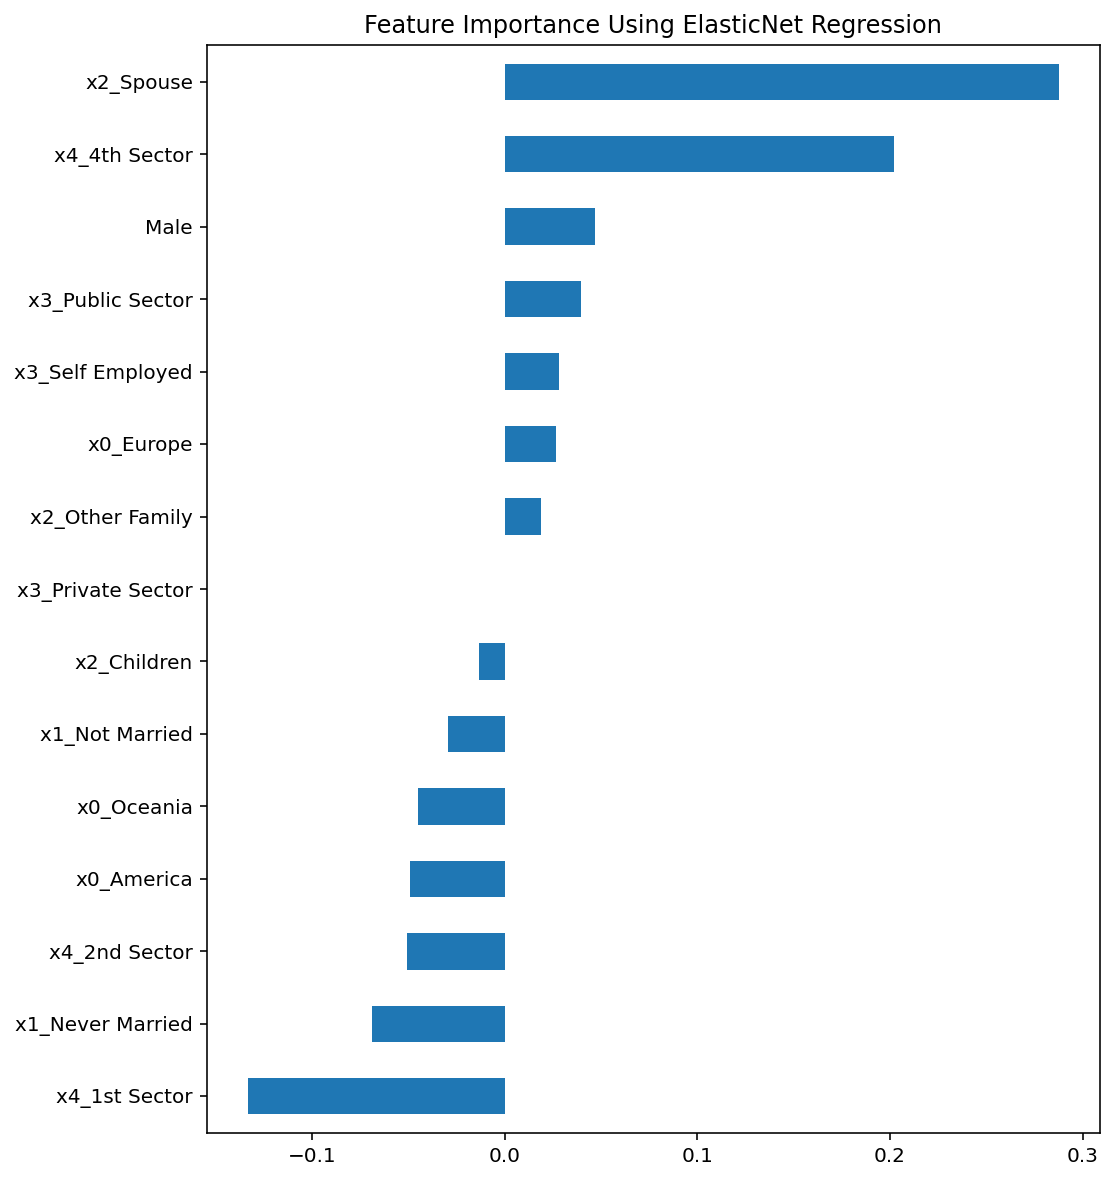

In [77]:
ElasticNet_Reg = ElasticNet(l1_ratio = ElasticNet_Best_L1_Alpha.l1_ratio_, alpha = ElasticNet_Best_L1_Alpha.alpha_, random_state = 2)
ElasticNet_Reg.fit(X_train_Original[binary_original], y_train)
coef_ElasticNet = pd.Series(ElasticNet_Reg.coef_, index = X_train_Original[binary_original].columns)
coef_ElasticNet.sort_values()
plot_importance(coef_ElasticNet, 'ElasticNet')

# **Artificial Resampling**

In [78]:
X_train_AR = X_train_Original.copy()
new_binary = X_train_AR.drop(columns = ['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price', 'Age']).columns.to_list()

#Random Oversampling
RO = RandomOverSampler(sampling_strategy='minority', random_state=15)
X_RO, y_RO = RO.fit_resample(X_train_AR, y_train)

#Synthetic Minority Oversampling Technique: SMOTE

SMOTE = SMOTE(sampling_strategy='minority', random_state=15)
X_SMOTE, y_SMOTE = SMOTE.fit_resample(X_train_AR, y_train)

for i in new_binary:
    X_SMOTE[i] = np.round(X_SMOTE[i])

#Adaptive Synthetic Oversampling (ADASYN)

ADASYN = ADASYN(sampling_strategy='minority', random_state=15)
X_ADASYN, y_ADASYN = ADASYN.fit_resample(X_train_AR, y_train)
for i in new_binary:
    X_ADASYN[i] = np.round(X_ADASYN[i])

# **Simpler Models**

## Logistic Regression

In [79]:
log_model = LogisticRegression(random_state=15).fit(X_train_Original,y_train)
metrics_val(y_train ,log_model.predict(X_train_Original) , y_val, log_model.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     10160
           1       0.72      0.53      0.61      2968

    accuracy                           0.85     13128
   macro avg       0.79      0.74      0.76     13128
weighted avg       0.84      0.85      0.84     13128

[[9533  627]
 [1389 1579]]
F1-score, micro:  0.8464351005484461
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

## Gaussian Naive Bayes

In [80]:
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy() #, 'x4_2nd Sector'
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

modelNB = GaussianNB().fit(X = X_train_RC, y = y_train)
metrics_val(y_train ,modelNB.predict(X_train_RC) , y_val, modelNB.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     10160
           1       0.63      0.57      0.60      2968

    accuracy                           0.83     13128
   macro avg       0.75      0.74      0.74     13128
weighted avg       0.82      0.83      0.82     13128

[[9169  991]
 [1280 1688]]
F1-score, micro:  0.8270109689213893
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

## Decision Trees

In [81]:
# model = DecisionTreeClassifier()

# #We will use adam because (...)

# #Parametros so para adam
# parameter_space_MLP_adam_DT = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [int(x) for x in np.round(np.linspace(1,50,50))],
#     'min_samples_split':[int(x) for x in np.round(np.linspace(2,50,50))],
#     'min_samples_leaf':[int(x) for x in np.round(np.linspace(1,20,2))],
#     'min_weight_fraction_leaf':[0.01,0.05,0.1,0.15,0.2],
#     'random_state':[15]
# }

# MLP_GS_adam_DT = GridSearchCV(model, parameter_space_MLP_adam_DT, scoring='f1_micro', n_jobs = -1, cv=10)
# MLP_GS_adam_DT.fit(X_train_Original, y_train)
# MLP_GS_adam_DT.best_params_

dt_gini = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.01, random_state=15)
dt_gini.fit(X_train_RC, y_train)
print('The defined three has a depth of ' + str(dt_gini.get_depth()) + ', ' + str(dt_gini.tree_.node_count) + ' nodes and a total of ' + str(dt_gini.get_n_leaves()) + ' leaves.')
metrics_val(y_train ,dt_gini.predict(X_train_RC) , y_val,dt_gini.predict(X_val_RC))

The defined three has a depth of 8, 97 nodes and a total of 49 leaves.
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10160
           1       0.76      0.52      0.62      2968

    accuracy                           0.85     13128
   macro avg       0.81      0.74      0.76     13128
weighted avg       0.85      0.85      0.84     13128

[[9667  493]
 [1423 1545]]
F1-score, micro:  0.8540524070688604
___________________________________________________________________________________________________________
                                                VALIDATION                                                

## Instance Based Learning

In [82]:
#K Nearest Neighbors

#k = 5
#cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=15)

# #knn_parameters = {'n_neighbors' : np.arange(1,31,1),
#                    'metric' : ['euclidean', 'cosine', 'manhattan', 'minkowski'],
#                    'weights' : ['uniform', 'distance'],
#                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

#knn_grid = GridSearchCV(estimator=knn_clf, param_grid=knn_parameters, cv=cv, scoring='f1_micro', verbose=1, n_jobs=-1)
#knn_grid.fit(Dataset2, y_train)
#knn_grid.best_params_

#{'algorithm': 'ball_tree',
# 'metric': 'manhattan',
# 'n_neighbors': 18,
# 'weights': 'uniform'}

knn = KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=18, weights='uniform').fit(X_train_RC, y_train)
metrics_val(y_train ,modelNB.predict(X_train_RC) , y_val,modelNB.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     10160
           1       0.63      0.57      0.60      2968

    accuracy                           0.83     13128
   macro avg       0.75      0.74      0.74     13128
weighted avg       0.82      0.83      0.82     13128

[[9169  991]
 [1280 1688]]
F1-score, micro:  0.8270109689213893
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [83]:
#K Nearest Centroid

#k = 5
#cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=15)

#knc_clf = NearestCentroid()
#knc_parameters = {'metric' : ['euclidean', 'cosine', 'manhattan']}
#knc_grid = GridSearchCV(estimator=knc_clf, param_grid=knc_parameters, cv=cv, scoring='f1_micro', verbose=1, n_jobs=-1)
#knc_grid.fit(Dataset3, y_train)
#knc_grid.best_params_

knc = NearestCentroid(metric='manhattan').fit(X_train_RC, y_train)
metrics_val(y_train ,modelNB.predict(X_train_RC) , y_val,modelNB.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     10160
           1       0.63      0.57      0.60      2968

    accuracy                           0.83     13128
   macro avg       0.75      0.74      0.74     13128
weighted avg       0.82      0.83      0.82     13128

[[9169  991]
 [1280 1688]]
F1-score, micro:  0.8270109689213893
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

# **Elaborate Models**

## **Support Vector Machines**

In [84]:
modelSVM = SVC(kernel='poly')
modelSVM.fit(X_train_Original,y_train)
metrics_val(y_train,modelSVM.predict(X_train_Original) , y_val,modelSVM.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10160
           1       0.75      0.51      0.61      2968

    accuracy                           0.85     13128
   macro avg       0.81      0.73      0.76     13128
weighted avg       0.84      0.85      0.84     13128

[[9663  497]
 [1453 1515]]
F1-score, micro:  0.8514625228519195
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

## **Multilayer Perceptron**

In [103]:
#First MLP Grid Search

#X_train_FirstTry = X_train_Original.drop(columns = ['x0_Oceania', 'x0_America', 'x1_Not Married', 'x3_Private Sector', 'x4_2nd Sector'])
#X_val_FirstTry = X_val_Original[X_train_FirstTry.columns.to_list()]

#model = MLPClassifier()
#parameter_space = {
#    'hidden_layer_sizes': [(5), (6), (7), (8), (9), (10), (11), (12), (13), (14), (5,5), (6,6), (7,7), (8,8), (9,9), (10,10), (11,11), (12,12), (13,13), (14,14)],
#    'activation': ['tanh', 'relu', 'logistic'],
#    'solver': ['sgd', 'adam'],
#    'learning_rate_init': list(np.linspace(0.00001,0.1,5)),
#    'learning_rate': ['constant','adaptive']
#}
#First_GS = GridSearchCV(model, parameter_space, n_jobs = -1)
#First_GS.fit(X_train_FirstTry, y_train)
#First_GS.best_params_

#{'activation': 'tanh',
# 'hidden_layer_sizes': 9,
# 'learning_rate': 'constant',
# 'learning_rate_init': 0.025007500000000002,
# 'solver': 'adam'}

#Second MLP Grid Search

#model = MLPClassifier()

#parameter_space_MLP_adam = {
#    'hidden_layer_sizes': [(20,50),(12,20),(50,100),(20,20),(200),(100,200),(100),(200,100),(30,50),(35,60),(10,20),(50)],
#    'activation': ['tanh', 'relu', 'logistic'],
#    'solver': ['adam'],
#    'learning_rate_init': [0.1,0.01,0.001,0.0001],
#    'alpha':[0.1,0.01, 0.001, 0.0001,0.00001],
#    'batch_size':[200,600,1300],
#    'random_state':[15],
#    'max_iter':[1000]
#}

#MLP_GS_adam = GridSearchCV(model, parameter_space_MLP_adam, scoring='f1_micro', n_jobs = -1, cv=10)
#MLP_GS_adam.fit(X_train_Original, y_train)
#MLP_GS_adam.best_params_
###########################################################FALTA ISTO


#Third MLP Grid Search

#parameter_space_MLP_sgd = {
#    'hidden_layer_sizes': [(20,50),(12,20),(50,100),(20,20),(200),(100,200),(100),(200,100),(30,50),(35,60),(10,20),(50)],
#    'activation': ['tanh', 'relu', 'logistic'],
#    'solver': ['sgd'],
#    'learning_rate_init': [0.1,0.01,0.001,0.0001],
#    'learning_rate': ['constant','adaptive'],
#    'alpha':[0.1,0.01, 0.001, 0.0001,0.00001],
#    'batch_size':[200,600,1300],
#    'random_state':[15],
#    'max_iter':[1000]
#}

#MLP_GS_sgd = GridSearchCV(model, parameter_space_MLP_sgd, scoring='f1_micro', n_jobs = -1, cv=10)
#MLP_GS_sgd.fit(X_train_Original, y_train)
#MLP_GS_sgd.best_params_
###########################################################FALTA ISTO

X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy() #, 'x4_2nd Sector'
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

MLP_final = MLPClassifier(hidden_layer_sizes = (50,125,10), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.00001, random_state = 15)

MLP_final.fit(X_train_RC, y_train)
metrics_val(y_train, MLP_final.predict(X_train_RC), y_val, MLP_final.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     10160
           1       0.76      0.57      0.65      2968

    accuracy                           0.86     13128
   macro avg       0.82      0.76      0.78     13128
weighted avg       0.86      0.86      0.85     13128

[[9624  536]
 [1275 1693]]
F1-score, micro:  0.8620505789152956
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

# **Ensembling**

## **Random Forests**

In [86]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [5,7,9,10,11,15,20]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [25,65,105,145,185,225]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1,5,10,25,50,100]
# # Method of selecting samples for training each tree
# bootstrap = [True]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# from sklearn.model_selection import RandomizedSearchCV
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier(random_state=42)
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = GridSearchCV(rf, random_grid, cv = 10 , n_jobs = -1, scoring = 'f1_micro')
# rf_random.fit(X_train_RC, y_train)
# rf_random.best_params_

# {'bootstrap': True,
#  'max_depth': 11,
#  'max_features': 'auto',
#  'min_samples_leaf': 1,
#  'min_samples_split': 25,
#  'n_estimators': 200}

modelRF = RandomForestClassifier(n_estimators=200,max_depth=11,max_features='auto',bootstrap=True,criterion='entropy',min_samples_leaf=1,min_samples_split=25,random_state=42)
modelRF.fit(X_train_RC, y_train)
metrics_val(y_train,modelRF.predict(X_train_RC) , y_val,modelRF.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     10160
           1       0.81      0.54      0.65      2968

    accuracy                           0.87     13128
   macro avg       0.85      0.75      0.78     13128
weighted avg       0.86      0.87      0.86     13128

[[9795  365]
 [1363 1605]]
F1-score, micro:  0.8683729433272395
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

## **Bagging KNN**

In [87]:
modelKNN = KNeighborsClassifier(metric='manhattan', n_neighbors=18, weights='uniform')
bagging_KNN = BaggingClassifier(base_estimator = modelKNN, random_state = 5).fit(X = X_train_RC, y = y_train)
metrics_val(y_train,bagging_KNN.predict(X_train_RC) , y_val,bagging_KNN.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10160
           1       0.75      0.58      0.65      2968

    accuracy                           0.86     13128
   macro avg       0.82      0.76      0.78     13128
weighted avg       0.85      0.86      0.85     13128

[[9588  572]
 [1257 1711]]
F1-score, micro:  0.8606794637416209
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

## **Adaboost**

In [88]:
#AdaBoost first GridSearch
#model = AdaBoostClassifier()
#
#parameter_space_Ada = {
#     'n_estimators': [10,50,100,500,1000,1500,2000,2500,3000,3500,4000,4500,5000],
#    'learning_rate': [1,0.1,0.01,0.001,0.0001],
#    'random_state':[15],
#}

#AdaBoost = GridSearchCV(model, parameter_space_Ada, scoring='f1_micro', n_jobs = -1, cv=10)
#AdaBoost.fit(X_train_RC, y_train)
#AdaBoost.best_params_
#{'learning_rate': 1, 'n_estimators': 2500, 'random_state': 15}

#AdaBoost second Grid Search

#model = AdaBoostClassifier(n_estimators = 2500, learning_rate = 1, random_state = 15)

#parameter_space_Ada = {
#     'base_estimator': [DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=5),DecisionTreeClassifier(max_depth=10)],
#}

#AdaBoost = GridSearchCV(model, parameter_space_Ada, scoring='f1_micro', n_jobs = -1, cv=10)
#AdaBoost.fit(X_train_RC, y_train)
#AdaBoost.best_params_

#{'base_estimator': DecisionTreeClassifier(max_depth=1)}
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()


AdaBoost_Final = AdaBoostClassifier(n_estimators = 2500, learning_rate = 1, random_state = 15).fit(X_train_RC, y_train)

metrics_val(y_train, AdaBoost_Final.predict(X_train_RC), y_val, AdaBoost_Final.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10160
           1       0.77      0.61      0.68      2968

    accuracy                           0.87     13128
   macro avg       0.83      0.78      0.80     13128
weighted avg       0.86      0.87      0.86     13128

[[9612  548]
 [1172 1796]]
F1-score, micro:  0.8689823278488725
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

## **Gradient Boosting**

In [89]:
#Gradient Boost first Grid Search

#model = GradientBoostingClassifier(subsample=0.8, min_samples_split=65, max_depth=6, max_features='sqrt', random_state=15)

#parameter_space_GB = {
#     'n_estimators': [20,40,60,80,100,150,200],
#    'learning_rate': [1,0.1,0.01,0.001,0.0001],
#}

#GradientBoost = GridSearchCV(model, parameter_space_GB, scoring='f1_micro', n_jobs = -1, cv=10)
#GradientBoost.fit(X_train_RC, y_train)
#GradientBoost.best_params_
#{'learning_rate': 0.1, 'n_estimators': 150}

#Gradient Boost second Grid Search

#model = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, subsample=0.8, max_features='sqrt', random_state=15)

#parameter_space_GB = {
#     'max_depth': [2,4,6,8,10,12,14],
#    'min_samples_split': [25,65,105,145,185,225],
#}

#GradientBoost = GridSearchCV(model, parameter_space_GB, scoring='f1_micro', n_jobs = -1, cv=10)
#GradientBoost.fit(X_train_RC, y_train)
#GradientBoost.best_params_
#{'max_depth': 8, 'min_samples_split': 145}

#Gradient Boost third Grid Search

#model = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, subsample=0.8, min_samples_split=105, max_depth=7, max_features='sqrt', random_state=15)

#parameter_space_GB = {
#    'min_samples_leaf': [5,10,25,50,100,150],
#}

#GradientBoost = GridSearchCV(model, parameter_space_GB, scoring='f1_micro', n_jobs = -1, cv=10)
#GradientBoost.fit(X_train_RC, y_train)
#GradientBoost.best_params_
#{'min_samples_leaf': 25}

#Gradient Boost fourth Grid Search

#X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
#X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

#model = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, min_samples_split=105, min_samples_leaf=1, max_depth=7, max_features='sqrt', random_state=15)

#parameter_space_GB = {
#    'subsample': [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
#}

#GradientBoost = GridSearchCV(model, parameter_space_GB, scoring='f1_micro', n_jobs = -1, cv=10)
#GradientBoost.fit(X_train_RC, y_train)
#GradientBoost.best_params_
#{'subsample': 0.95}

GradientBoost_Final = GradientBoostingClassifier(n_estimators=160, learning_rate=0.05, subsample=0.8, min_samples_split=105, min_samples_leaf=1, max_depth=7, max_features='sqrt', random_state=15).fit(X_train_RC, y_train)

metrics_val(y_train, GradientBoost_Final.predict(X_train_RC), y_val, GradientBoost_Final.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10160
           1       0.79      0.61      0.69      2968

    accuracy                           0.88     13128
   macro avg       0.84      0.78      0.81     13128
weighted avg       0.87      0.88      0.87     13128

[[9674  486]
 [1155 1813]]
F1-score, micro:  0.875
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------

## **Stacking**

In [90]:
estimators = [('GNB', GaussianNB()),
              ('DTC', DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.01, random_state=15)),
              ("KNN",KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=18, weights='uniform')),
              ]
sub13 = StackingClassifier(estimators=estimators, final_estimator= LogisticRegression())
sub13.fit(X_train_Original, y_train)

metrics_val(y_train, sub13.predict(X_train_Original), y_val, sub13.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     10160
           1       0.75      0.55      0.64      2968

    accuracy                           0.86     13128
   macro avg       0.82      0.75      0.77     13128
weighted avg       0.85      0.86      0.85     13128

[[9625  535]
 [1333 1635]]
F1-score, micro:  0.8577087141986593
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

# **Final Model Assessment**

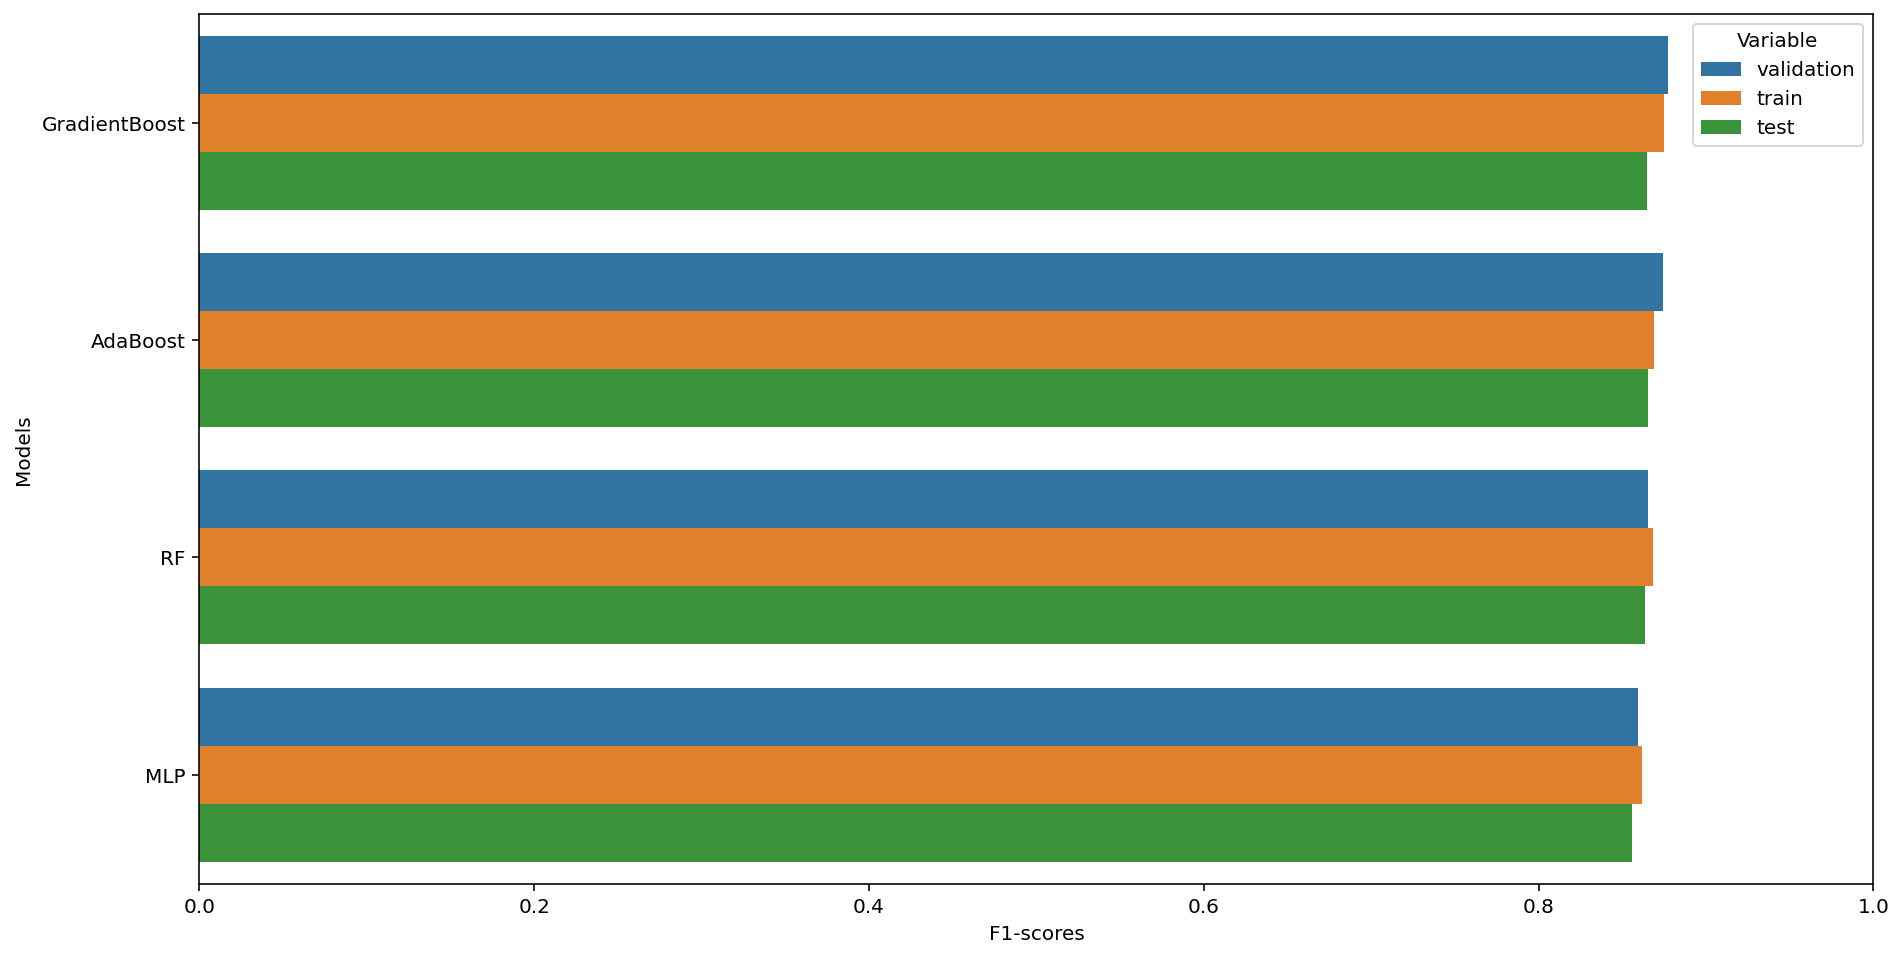

In [91]:
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_test_RC = X_test_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

MLP_final = MLPClassifier(hidden_layer_sizes = (50,125,10), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.00001, random_state = 15).fit(X_train_RC, y_train)

modelRF = RandomForestClassifier(n_estimators=200,max_depth=11,max_features='auto',bootstrap=True,criterion='entropy',min_samples_leaf=1,min_samples_split=25,random_state=42).fit(X_train_RC, y_train)

AdaBoost_Final = AdaBoostClassifier(n_estimators = 2500, learning_rate = 1, random_state = 15).fit(X_train_RC, y_train)

GradientBoost_Final = GradientBoostingClassifier(n_estimators=160, learning_rate=0.05, subsample=0.8, min_samples_split=105, min_samples_leaf=1, max_depth=7, max_features='sqrt', random_state=15).fit(X_train_RC, y_train)

models = [MLP_final, modelRF, AdaBoost_Final, GradientBoost_Final]

f1_micro_train = []
f1_micro_val = []
f1_micro_test = []

for i in models:
    f1_micro_train.append(f1_score(y_train, i.predict(X_train_RC), average = 'micro'))
    f1_micro_val.append(f1_score(y_val, i.predict(X_val_RC), average = 'micro'))
    f1_micro_test.append(f1_score(y_test, i.predict(X_test_RC), average = 'micro'))

final_scores = pd.DataFrame(zip(f1_micro_train, f1_micro_val, f1_micro_test), columns = ['train','validation', 'test'])
final_scores['col'] = ['MLP', 'RF', 'AdaBoost', 'GradientBoost']
final_scores = final_scores.melt(id_vars = 'col').rename(columns = str.title).sort_values(['Value'], ascending = False)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=final_scores)
plt.xlim(0,1)
plt.xlabel('F1-scores')
plt.ylabel('Models')
plt.show()

In [113]:
final_metrics(y_train, AdaBoost_Final.predict(X_train_RC), y_val, AdaBoost_Final.predict(X_val_RC), y_test, AdaBoost_Final.predict(X_test_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10160
           1       0.77      0.61      0.68      2968

    accuracy                           0.87     13128
   macro avg       0.83      0.78      0.80     13128
weighted avg       0.86      0.87      0.86     13128

[[9612  548]
 [1172 1796]]
F1-score, micro:  0.8689823278488725
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

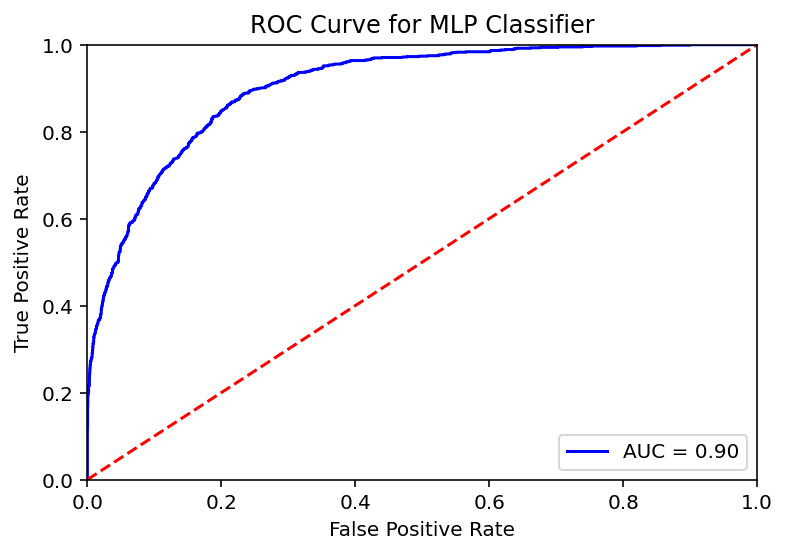

In [93]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = MLP_final.predict_proba(X_test_RC)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('ROC Curve for MLP Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

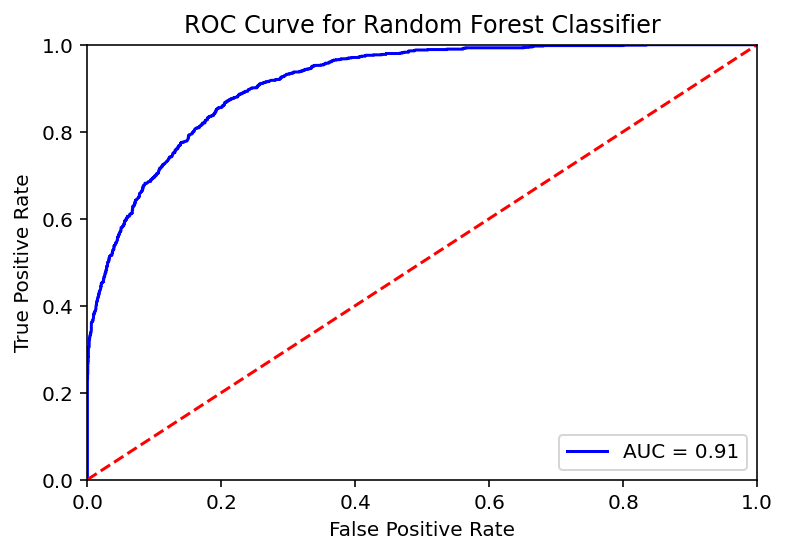

In [94]:
# calculate the fpr and tpr for all thresholds of the classification
probs = modelRF.predict_proba(X_test_RC)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('ROC Curve for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

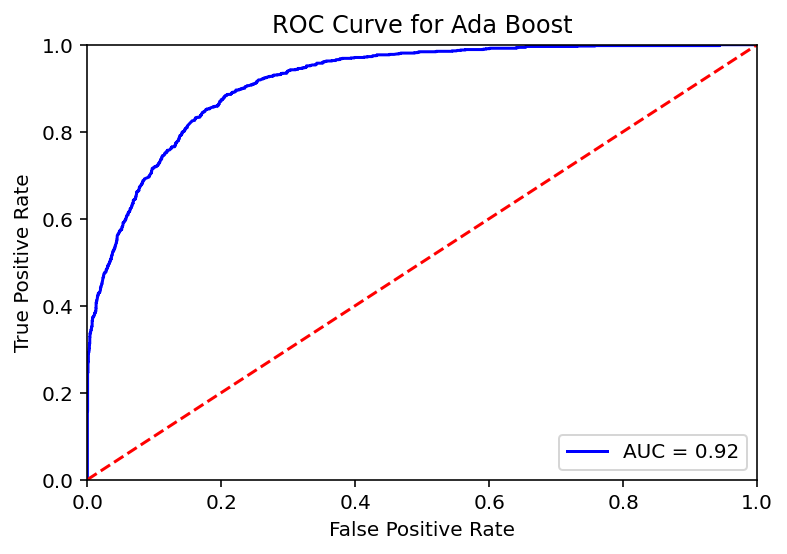

In [95]:
# calculate the fpr and tpr for all thresholds of the classification
probs = AdaBoost_Final.predict_proba(X_test_RC)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('ROC Curve for Ada Boost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

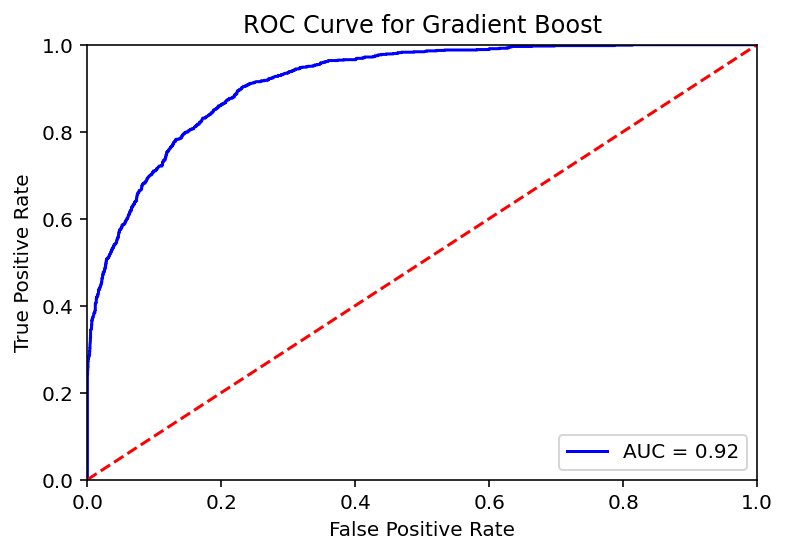

In [96]:
# calculate the fpr and tpr for all thresholds of the classification
probs = GradientBoost_Final.predict_proba(X_test_RC)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('ROC Curve for Gradient Boost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

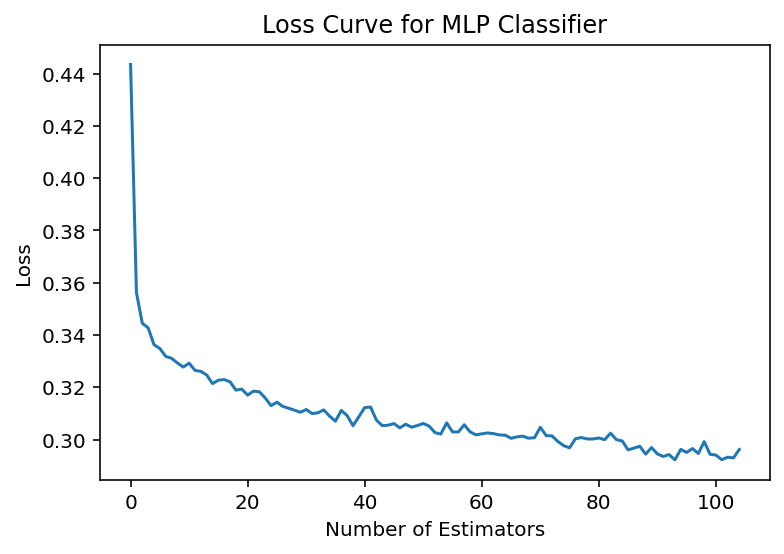

In [97]:
prd_r = MLP_final.predict(X_test_RC)
test_acc = f1_score(y_test, prd_r, average = 'micro') * 100.
loss_values = MLP_final.loss_curve_
plt.plot(loss_values)
plt.title('Loss Curve for MLP Classifier')
plt.ylabel('Loss')
plt.xlabel('Number of Estimators')
plt.show()

# **Kaggle**

In [106]:
AdaBoost_Final
kaggle = kaggle[X_train_RC.columns.to_list()]
submission['Income'] = pd.Series(AdaBoost_Final.predict(kaggle))
submission.to_csv('Group15_Version23.csv', index = False)